### Title: BUDGET ACCOMODATION IN GHANA

Rapid population growth and, in particular, increasing urbanization,
have made shelter one of the most critical challenges currently facing the
country. Increasing overcrowding, declining quality of housing and
access to housing services characterize much of the housing stock in
Ghana. The housing challenges in Ghana are therefore of two types: the
quantity and quality of housing. As empirically depicted in the Ghana
Housing Profile of 2011, the situation of quantitative and qualitative
challenges in the housing sector is very serious, requiring urgent action. 

### Introduction:

The United Nations Sustainable Development Goals includes a target for making cities and human
settlements inclusive, safe, resilient, and sustainable (Goal 11). A key outcome of this goal is to
provide opportunities for safe and affordable housing. The housing situation in Ghana is far from
the SDG target described above. As a result, it would be interesting to investigate the housing
situation in Ghana and provide an understanding of the housing situation. The goal of this project
therefore, is to use such an understanding to provide a description of places in the country that
provide the best options for budget accommodation.

##### Project Description 
In this project, analysis is conducted on two datasets; apartment for rent and house for sale. The project focuses on two major cities in Ghana namely Accra and Kumasi. In each of the datasets, the analysis is conducted separately for Kumasi and Accra respectively.




##### Dataset Description:
The dataset used in this project was obtained from [source1](https://tonaton.com/en/ads/ghana/apartments?sort=date&buy_now=0&urgent=0&page=1) and  [source2](https://meqasa.com/apartments-for-rent-in-ghana?y=39411922&w=1)<br>
The dataset contains information about the aprtments foor rent in the Greater Accra and Greater Kumasi environs. The data considered the following features about the various apartments.
* rent price
* number of bedrooms
* number of bathrooms
* location of the apartment
* Most frequent number of bedrooms and bathrooms in each suburb

##### Goal:

The analysis seeks to find;
##### Summary statistics
* The suburb with the highest average rent price
* The average rent price for each suburb
* The most frequent number of bed and bathrooms
* The most affordable and expensive suburb in Accra and Kumasi 



## Importation of libraries

In [1]:
#imports
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import calendar
import re
#from wordcloud import WordCloud

In [2]:
df=pd.read_csv('tonaton_apartment.csv')
df.to_csv('rent.csv')

# Data Exploration
The apartment dataset contains 4222 observations and eleven attributes,two numerc data columns and nine non-numeric columns<br>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4220 entries, 0 to 4219
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      4220 non-null   object 
 1   web-scraper-start-url  4220 non-null   object 
 2   title                  4220 non-null   object 
 3   title-href             4220 non-null   object 
 4   desc                   4220 non-null   object 
 5   price                  4220 non-null   object 
 6   n_beds                 4220 non-null   int64  
 7   n_bath                 2988 non-null   float64
 8   location               4220 non-null   object 
 9   area                   4220 non-null   object 
 10  landmark               4220 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 362.8+ KB


# Data cleaning
In this section, the dataset is stripped of all double spaces and the datatypes for some columns area specified. <br>
The extraction of the actual locations of the houses is conducted at this stage.

In [4]:
def clean(data):
    data_obj=data.select_dtypes(['object'])
    data[data_obj.columns]=data_obj.apply(lambda x:x.str.strip())
    data[data_obj.columns]=data_obj.apply(lambda x:x.str.lower())
    data['price']=data['price'].str.replace(r'[^\d.]+','')
    
    #data['title']=data['title'].str.lower()
     # CONVERSION OF FURNISHED STATUS TO BINARY
    furnished=list(df['title'])
    for text in range(len(furnished)):
        if 'furnished' in furnished[text]:
            furnished[text]='furnished'
        else:
            furnished[text]='unfurnished'
    df['furnished']=furnished
    # HANDLING THE INCONSITENT VALUES IN N_BATH AND AREA
    for i in range(len(df['n_bath'])):
        if pd.notna(df['n_bath'][i])==True:
            pass
        else:
            df['n_bath'][i]=df['area'][i]
            df['area'][i]=df['landmark'][i]
            
            
  
    # CONVERSION OF AREA FORM SQUARE FEET TO SQUARE METRE
    area=list(df['area'])
    for element in range(len(area)):
        if 'sqft' in area[element]:
            #area[element]=area[element]
            area[element]=re.sub('\D', '', df['area'][element])
            area[element]=pd.to_numeric(area[element])/(107.639)
        else:
            area[element]=re.sub('\D', '', df['area'][element])
            area[element]=pd.to_numeric(area[element])/10
    df['area1']=area
    df['area1']=df['area1'].astype(int)
    df['price']=df['price'].astype(float)

clean(df)
#df.head()

<ipython-input-4-ea56dfba1228>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_bath'][i]=df['area'][i]
<ipython-input-4-ea56dfba1228>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'][i]=df['landmark'][i]


In [5]:
# EXTRACTION OF ADDRESS AND CITY FROM LOCATION
df['location']=df['location'].str.replace(r'.*am,','')
df['location']=df['location'].str.replace(r'.*pm,','')
df['location']=df['location'].str.lower()



df['location1']=df['location'].str.lower()
df['location']=df['location'].apply(lambda x:x.strip())

address=df['location'].str.split(',',expand=True)
address.rename(columns={0:'suburb',1:'city'},inplace=True)
ad_obj=address.select_dtypes(['object'])
address[ad_obj.columns]=ad_obj.apply(lambda x:x.str.strip())

df1=df.merge(address,left_index=True, right_index=True)
df1['n_bath']=df['n_bath'].astype(int)

## Cleaning Kumasi dataset
The code cell below groups the houses into the appropriate locations/suburbs in the greater Kumasi metropolis.

In [6]:
df_ksi=pd.DataFrame(df1[df1['city']=='kumasi'])
df_ksi.reset_index(drop=True)

df_ksi['loc']=df_ksi['landmark'].str.extract(r'(\w+)')
loc=list(df_ksi['loc'])
for element in range(len(loc)):
#     #df1['Title'][i].strip()
    if 'anyinam' in loc[element]:
        loc[element]='santasi'
        
    elif 'adom' in loc[element] or 'opokukrom' in loc[element]:
        loc[element]='apatrapa' 
    
    elif 'kronum' in loc[element] or 'kromum' in loc[element] or 'krunom' in loc[element]:
        loc[element]='kronum' 
        
    elif '120' in loc[element]:
        loc[element]='kenyasi' 
        
    elif '100' in loc[element] or 'down' in loc[element] :
        loc[element]='kwadaso'     
        
    elif '13' in loc[element] or 'opoku' in loc[element] :
        loc[element]='tanoso'   
        
    elif '90' in loc[element]:
        loc[element]='kokoben' 
    
    elif 'passion' in loc[element]:
        loc[element]='buokrom' 
    
    elif 'behind' in loc[element] or 'around' in loc[element] :
        loc[element]='santasi' 
        
    elif 'ahojo' in loc[element] or 'ahodwo' in loc[element] :
        loc[element]='ahodwo' 
        
    elif 'apaaso' in loc[element] or 'sokoban' in loc[element] :
        loc[element]='sokoban' 
        
    elif 'knust' in loc[element] or 'tech' in loc[element] or 'teck' in loc[element] or 'deduako' in loc[element] or 'emena' in loc[element] or 'boadi' in loc[element]:
        loc[element]='tech' 
        
    elif 'gyenyasi' in loc[element] or 'gyenyase' in loc[element]:
         loc[element]='gyenyase' 
    
    
    else:    
        loc[element]=loc[element]
df_ksi['loc1']=loc

kumasi_df=pd.DataFrame(df_ksi[[ 'title','price', 'n_beds', 'n_bath', 'area1','loc1','furnished']])
kumasi_df.rename(columns={'n_beds':'no_bedrooms','n_bath':'no_bathrooms','area1':'area(sqm)',
                          'loc1':'location','price':'price(cedis)'},inplace=True)


## Cleaning Accra dataset
The code cell below cleans the Accra dataset from whitespaces and groups the houses into  their appropriate suburbs/locations. 

In [7]:
df_accra=pd.DataFrame(df1[df1['city']=='accra'])
df_accra.reset_index(drop=True)
loc=list(df_accra['suburb'])
for element in range(len(loc)):
#     #df1['Title'][i].strip()
    if 'east legon' in loc[element] or 'eastlegon' in loc[element] or 'adjiringanor' in loc[element]:
        loc[element]='east legon'
        
    elif 'weija' in loc[element]:# or 'cantonment' in location[element]:
         loc[element]='wieja' 
    
    elif 'la-aborm' in loc[element]:
         loc[element]='labadi' 
        
    
    else:    
         loc[element]=loc[element]
df_accra['loc']=loc

df_accra1=pd.DataFrame(df_accra[df_accra['suburb']!='other'])
accra_df=pd.DataFrame(df_accra1[['title','price', 'n_beds', 'n_bath', 'area1', 'loc','furnished']])
accra_df.rename(columns={'n_beds':'no_bedrooms','n_bath':'no_bathrooms','area1':'area(sqm)',
                          'loc':'location','price':'price(cedis)'},inplace=True)
final_df=pd.concat([kumasi_df,accra_df])
final_df.reset_index(drop=True, inplace=True) 

# Analysis of Kumasi Dataset
The analysis of the Kumasi dataset is as follows
* The data was categorized into furnished and unfurnished apartments.
* The average price of an apartment is analyzed under this heading
* The most frequent number of bedroom aprtment for each suburb is also analyzed


## Exploration
The dataset set contains a total of 227 apartments; out of which 6 are furnished


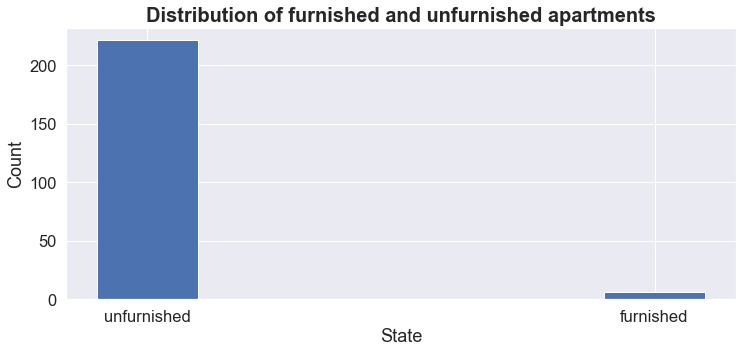

In [13]:
furnished_grouping_ksi=kumasi_df.groupby('furnished')['furnished'].agg('count').sort_values(ascending=False)

x_axis,y_axis=furnished_grouping_ksi.index,furnished_grouping_ksi.values
plt.figure(figsize=(12,5))
fig=plt.bar(x_axis, y_axis, width=0.2);
plt.title("Distribution of furnished and unfurnished apartments",weight='bold').set_fontsize('20')
plt.xlabel('State')
plt.ylabel('Count')
sns.set(font_scale=1.5) 
plt.show(fig)

## Exploration of number bedrooms for both furnished and unfurnished apartment
The Kumasi dataset has 75, 74, 61, 15, 2 apartments with 1, 2, 3, 4 and 5 bedrooms respectively


In [14]:
bedroom_ksi=kumasi_df.groupby('no_bedrooms')['no_bedrooms'].agg('count').sort_values(ascending=False)
ksi_bedroom=pd.DataFrame(bedroom_ksi)
ksi_bedroom.rename(columns={'no_bedrooms':'Count'},inplace=True)
ksi_bedroom.reset_index(inplace=True)
ksi_bedroom

,no_bedrooms,Count
0,1,75
1,2,74
2,3,61
3,4,15
4,5,2


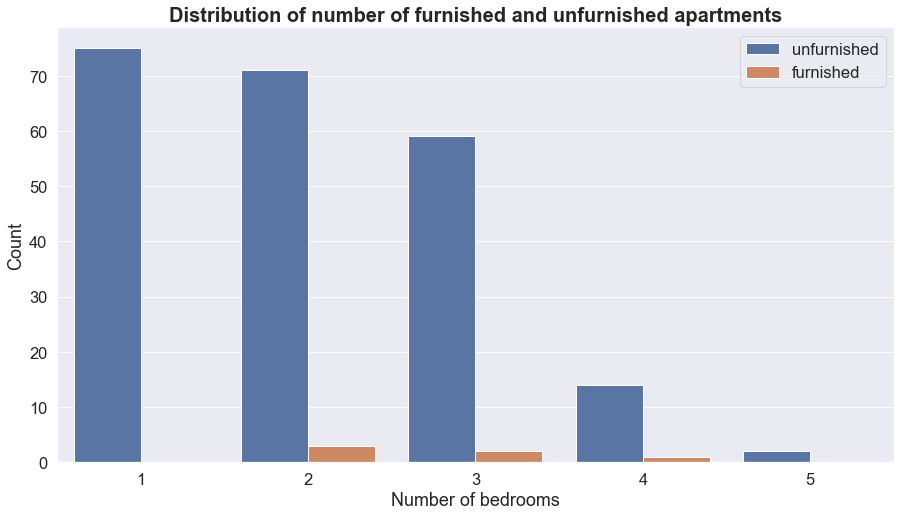

In [15]:
x_axis,y_axis=bedroom_ksi.index,bedroom_ksi.values
plt.figure(figsize=(15,8))
fig = sns.countplot(x="no_bedrooms", hue="furnished", data=kumasi_df)
#fig=rr.plot(kind='bar')
plt.title("Distribution of number of furnished and unfurnished apartments",weight='bold').set_fontsize('20')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.legend(loc='upper right')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## Distribution of Price
The distribution of the price is heavily skewed towards the right. This means there are few houses with<br>
very high prices pulling the mean towards the right. <br>
Most of the aparments have rent price less than 5000 cedis per month

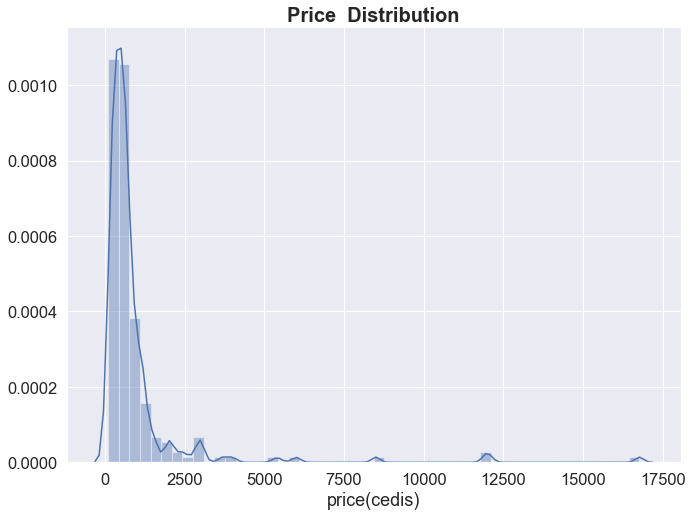

In [16]:
plt.figure(figsize=(11,8))
fig = sns.distplot(kumasi_df['price(cedis)'])
plt.title("Price  Distribution",weight='bold').set_fontsize('20')
sns.set(font_scale=1.5) 
#fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## log transformation of the price
Taking log base 10 of the prices, the distribution reshapes to the normal distribution

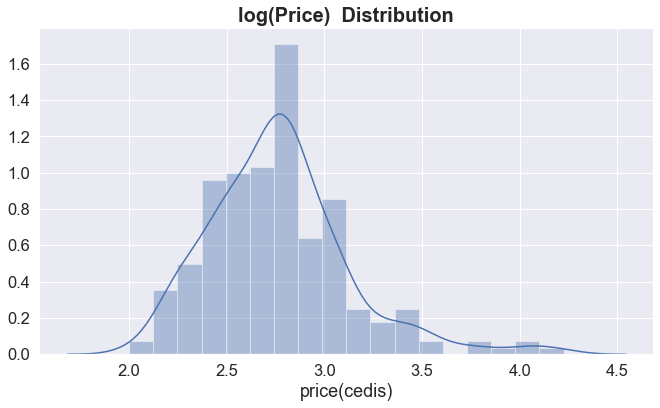

In [17]:
x_axis,y_axis=bedroom_ksi.index,bedroom_ksi.values
plt.figure(figsize=(11,6))
fig = sns.distplot(np.log10(kumasi_df['price(cedis)']))
plt.title("log(Price)  Distribution",weight='bold').set_fontsize('20')
sns.set(font_scale=1.5) 
#fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

# Furnished apartments
The cell below selects all the furnished apartments in the Kumasi Dataset\
<br>

In [23]:
furnished_ksi=pd.DataFrame(kumasi_df[kumasi_df['furnished']=='furnished'])
furnished_ksi['furnished'].replace({'furnished':1,'unfurnished':0},inplace=True)
furnished_ksi

,title,price(cedis),no_bedrooms,no_bathrooms,area(sqm),location,furnished
104,"furnished 3bedroom at kwadaso agricbeds: 3, ba...",2800.0,4,3,9,kwadaso,1
362,furnished two bedroom flat ahojo nhyieasobeds:...,6000.0,2,2,100,ahodwo,1
409,"furnished 3 bedroom danyamebeds: 3, baths: 3me...",8500.0,3,3,100,danyame,1
671,"monthly fully furnished 3bed@kumasibeds: 3, ba...",16767.0,3,4,83,ridge,1
938,two bedroom fully furnished at santasi rentbed...,683.0,2,3,10,santasi,1
2464,furnished two bedroom in kokoben new sitebeds:...,2500.0,2,2,100,kokoben,1


## Average price of furnished apartment for each suburb
Fro the analysis, it is observed that;
* Ridge has the highest average price (16,767 cedis per month) for a three bedroom apartment
* Danyame follows in the second position with a price 8,500 cedis per month for a three bedroom apartment
* Santasi has the cheapest price for a furnished aprtment with two bedrooms


In [24]:
ksi_avg_furnished=pd.DataFrame(furnished_ksi[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    furnished_ksi['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
ksi_avg_furnished.reset_index(inplace=True)
ksi_avg_furnished

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,ridge,16767,3,4,83
1,danyame,8500,3,3,100
2,ahodwo,6000,2,2,100
3,kwadaso,2800,4,3,9
4,kokoben,2500,2,2,100
5,santasi,683,2,3,10


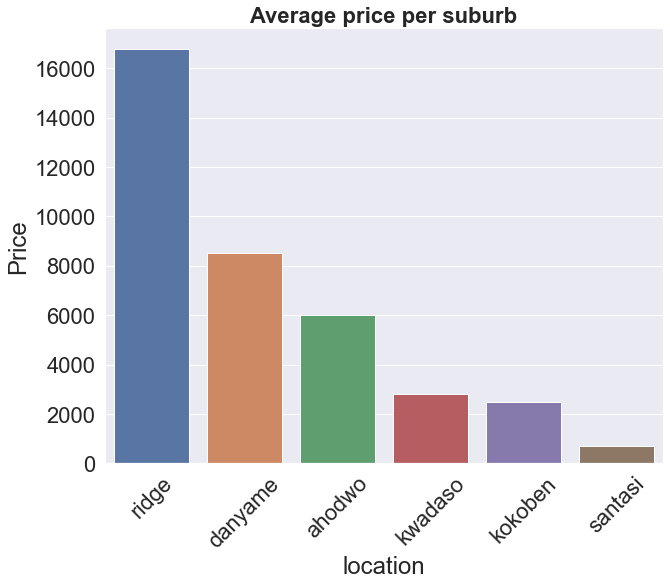

In [25]:
x_axis,y_axis=ksi_avg_furnished.location,ksi_avg_furnished['price(cedis)']
plt.figure(figsize=(10,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price per suburb",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average price of a two bedroom furnished apartment in some suburbs
For a two bedroom apartment; <br>
* The most expensive suburb is Ahodwo with cost 6,000 cedi per month for a two bedroom with two bathroom apartment and <br>
* The cheapest suburb is Santasi with a price of 680 cedis per month for a two bedroom with three bathrooms

In [26]:
df_two_bed=kumasi_df[(kumasi_df['no_bedrooms']==2) & (kumasi_df['furnished']=='furnished')]
df_two_bed

,title,price(cedis),no_bedrooms,no_bathrooms,area(sqm),location,furnished
362,furnished two bedroom flat ahojo nhyieasobeds:...,6000.0,2,2,100,ahodwo,furnished
938,two bedroom fully furnished at santasi rentbed...,683.0,2,3,10,santasi,furnished
2464,furnished two bedroom in kokoben new sitebeds:...,2500.0,2,2,100,kokoben,furnished


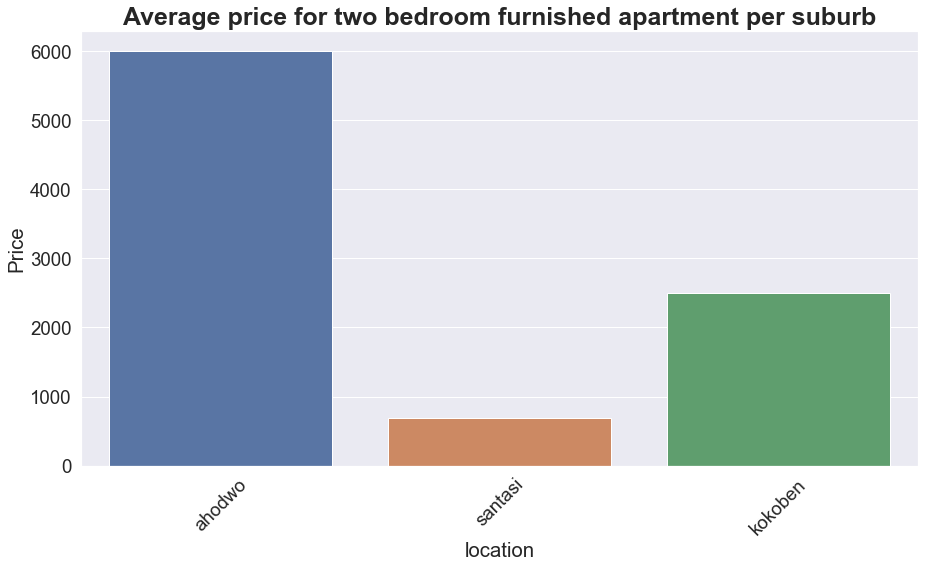

In [29]:
x_axis,y_axis=df_two_bed.location,df_two_bed['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two bedroom furnished apartment per suburb",weight='bold').set_fontsize('25')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.7) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average price of a three bedroom furnished apartment in some suburbs
For a three bedroom apartment; <br>
* The most expensive suburb is Ridge with cost 16,767 cedi per month for a three bedroom with four bathroom apartment and <br>
* The cheapest suburb is Danyame with a price of 8500 cedis per month for a three bedroom with three bathrooms

In [30]:
df_three_bed=kumasi_df[(kumasi_df['no_bedrooms']==3) & (kumasi_df['furnished']=='furnished')].sort_values('price(cedis)',ascending=False)
df_three_bed

,title,price(cedis),no_bedrooms,no_bathrooms,area(sqm),location,furnished
671,"monthly fully furnished 3bed@kumasibeds: 3, ba...",16767.0,3,4,83,ridge,furnished
409,"furnished 3 bedroom danyamebeds: 3, baths: 3me...",8500.0,3,3,100,danyame,furnished


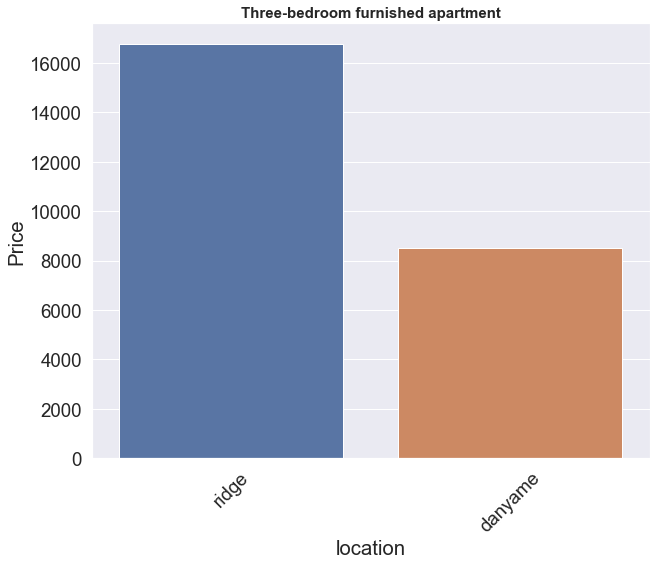

In [31]:
x_axis,y_axis=df_three_bed.location,df_three_bed['price(cedis)']
plt.figure(figsize=(10,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Three-bedroom furnished apartment",weight='bold').set_fontsize('15')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Unfurnished apartments

In [32]:

unfurnished_ksi=pd.DataFrame(kumasi_df[kumasi_df['furnished']=='unfurnished'])
unfurnished_ksi['furnished'].replace({'furnished':1,'unfurnished':0},inplace=True)

## Average price of unfurnished apartment for each suburb
Fro the analysis, it is observed that;
* Sokoban has the highest average price (4216 cedis per month) for a two bedroom apartment with two bathrooms.
* Danyame follows in the econd position with a price 3000 cedis per month for a four bedroom apartment with three bathrooms.
* Ayigya has the cheapest price for an unfurnished aprtment with 110 cedis for a one bedrooms apartment with one bathroom.


In [34]:
ksi_avg_unfurnished=pd.DataFrame(unfurnished_ksi[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
ksi_avg_unfurnished.reset_index(inplace=True)
ksi_avg_unfurnished

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,sokoban,4216,2,2,106
1,danyame,3000,4,3,100
2,ahodwo,1500,2,3,18
3,kenyasi,1400,3,3,11
4,parakuo,1200,2,1,100
5,kronum,1190,2,1,374
6,tech,1102,2,2,167
7,spe,1000,4,3,10
8,daban,991,2,2,40
9,apatrapa,950,2,2,33


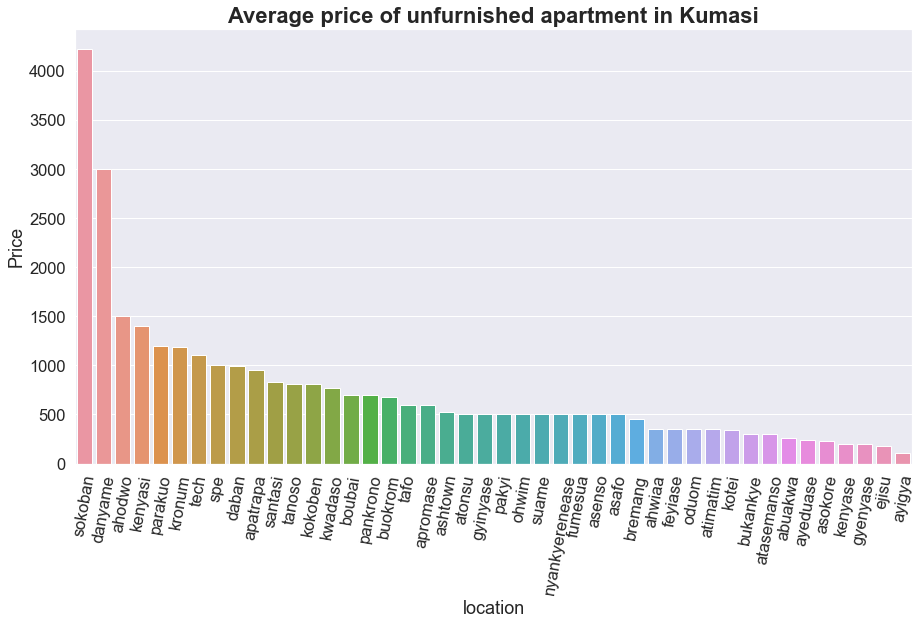

In [36]:
x_axis,y_axis=ksi_avg_unfurnished.location,ksi_avg_unfurnished['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price of unfurnished apartment in Kumasi",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=80)
plt.show(fig)

##  Average price of a one bedroom unfurnished apartment in some suburbs
For a one bedroom unfurnished apartment; <br>
* The most expensive suburb is Tanoso with an average price of 1600 cedis per month for a one bedroom with one bathroom apartment and <br>
* The cheapest suburb is Ayigya with an average price of 110 cedis per month for a one bedroom with one bathroom

In [37]:
unfurnished_for_one_bedroom=pd.DataFrame(unfurnished_ksi[(kumasi_df['no_bedrooms']==1) &  (kumasi_df['location']!='kronum')])
avg_price_unfurnished_for_one_bedroom=pd.DataFrame(unfurnished_for_one_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_one_bedroom.reset_index(inplace=True)
avg_price_unfurnished_for_one_bedroom
# & (kumasi_df['location']!='kronum')

<ipython-input-37-65ecc387b4e5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_one_bedroom=pd.DataFrame(unfurnished_ksi[(kumasi_df['no_bedrooms']==1) &  (kumasi_df['location']!='kronum')])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,tanoso,1600,1,1,11
1,tech,1124,1,1,61
2,kokoben,516,1,2,8
3,fumesua,500,1,1,10
4,kwadaso,398,1,1,39
5,santasi,380,1,1,17
6,feyiase,350,1,1,100
7,apatrapa,350,1,1,29
8,oduom,350,1,1,50
9,atasemanso,300,1,1,10


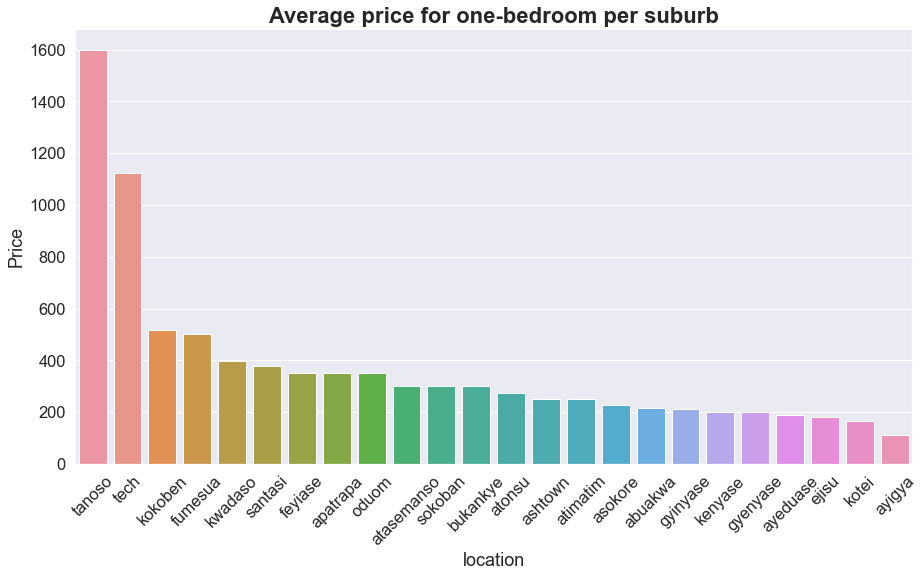

In [38]:
x_axis,y_axis=avg_price_unfurnished_for_one_bedroom.location,avg_price_unfurnished_for_one_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for one-bedroom per suburb",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.1) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

##  Average price of a two bedroom unfurnished apartment in some suburbs
For a two bedroom unfurnished apartment; <br>
* The most expensive suburb is Ahodwo with an average price of 1500 cedis per month for a two bedroom with three bathrooms apartment and <br>
* The cheapest suburb is Ayeduase with an average price of 325 cedis per month for a two bedroom with one bathroom

In [39]:
unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==2])
avg_price_unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_for_two_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_two_bedroom.reset_index(inplace=True)
avg_price_unfurnished_for_two_bedroom

<ipython-input-39-6bc5a9b8e546>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==2])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,ahodwo,1500,2,3,18
1,parakuo,1200,2,1,100
2,santasi,1144,2,1,10
3,daban,916,2,2,40
4,kronum,778,2,1,530
5,kokoben,750,2,2,8
6,kwadaso,668,2,2,9
7,tafo,600,2,3,10
8,atonsu,560,2,1,760
9,pakyi,500,2,3,10


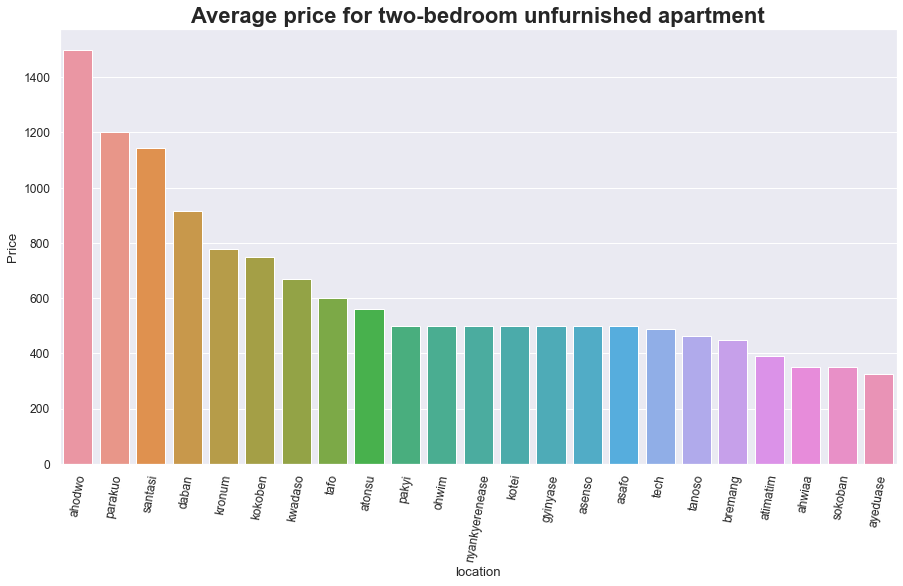

In [40]:
x_axis,y_axis=avg_price_unfurnished_for_two_bedroom.location,avg_price_unfurnished_for_two_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two-bedroom unfurnished apartment",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=80)
plt.show(fig)


##  Average price of a three bedroom unfurnished apartment in some suburbs
For a three bedroom unfurnished apartment; <br>
* The most expensive suburb is Tech with an average price of 1402 cedis per month for a three bedroom with two bathrooms apartment and <br>
* The cheapest suburb is Abuakwa with an average price of 300 cedis per month for a three bedroom with one bathroom
##
##

In [42]:
unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==3])
avg_price_unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_for_three_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_three_bedroom.reset_index(inplace=True)
avg_price_unfurnished_for_three_bedroom

<ipython-input-42-fffb7751139d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==3])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,tech,1402,3,2,267
1,santasi,1200,3,2,61
2,kenyasi,1200,3,3,11
3,kwadaso,1120,3,2,27
4,kokoben,1050,3,2,54
5,daban,800,3,2,55
6,kotei,800,3,2,1
7,gyinyase,800,3,2,104
8,ashtown,800,3,2,10
9,apatrapa,700,3,2,50


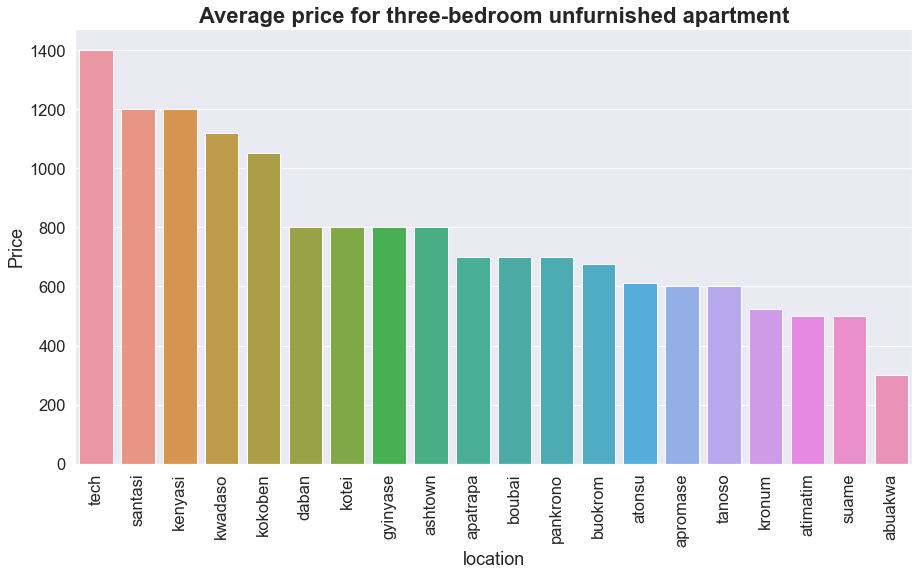

In [44]:
x_axis,y_axis=avg_price_unfurnished_for_three_bedroom.location,avg_price_unfurnished_for_three_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for three-bedroom unfurnished apartment",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

##  Average price of a four bedroom unfurnished apartment in some suburbs
For a four bedroom unfurnished apartment; <br>
* The most expensive suburb is Danyame with an average price of 3000 cedis per month for a two bedroom with three bathrooms apartment and <br>
* The cheapest suburb is Kotei with an average price of 400 cedis per month for a two bedroom with three bathroom <br>
<br>

In [45]:
unfurnished_for_four_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==4])
avg_price_unfurnished_for_four_bedroom=pd.DataFrame(unfurnished_for_four_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_four_bedroom.reset_index(inplace=True)
avg_price_unfurnished_for_four_bedroom

<ipython-input-45-c469c1e43bf4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_four_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==4])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,danyame,3000,4,3,100
1,daban,1600,4,4,10
2,kenyasi,1500,4,3,11
3,tech,1300,4,3,13
4,kwadaso,1280,4,3,9
5,spe,1000,4,3,10
6,atimatim,600,4,2,10
7,kotei,400,4,3,100


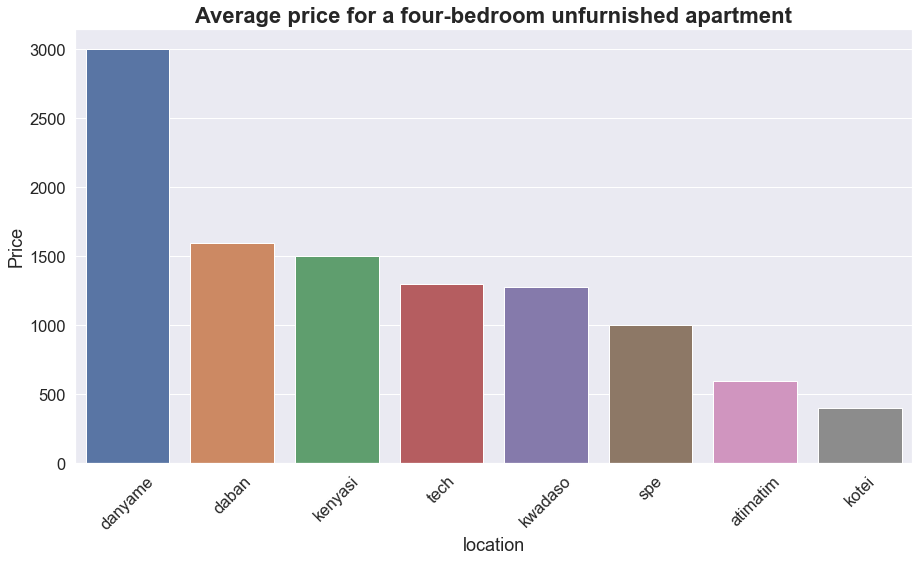

In [46]:
x_axis,y_axis=avg_price_unfurnished_for_four_bedroom.location,avg_price_unfurnished_for_four_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for a four-bedroom unfurnished apartment",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

##  Average price of a five bedroom unfurnished apartment in some suburbs
For a five bedroom unfurnished apartment; <br>
* The most expensive suburb is Sokoban with an average price of 12000 cedis per month for a five bedroom with four bathrooms apartment and <br>
* The cheapest suburb is Apatrapa with an average price of 2400 cedis per month for a five bedroom with five bathroom

In [47]:
unfurnished_for_five_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==5])
avg_price_unfurnished_for_five_bedroom=pd.DataFrame(unfurnished_for_five_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_five_bedroom.reset_index(inplace=True)
avg_price_unfurnished_for_five_bedroom

<ipython-input-47-9900d1896d9d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_five_bedroom=pd.DataFrame(unfurnished_ksi[kumasi_df['no_bedrooms']==5])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,sokoban,12000,5,4,200
1,apatrapa,2400,5,5,24


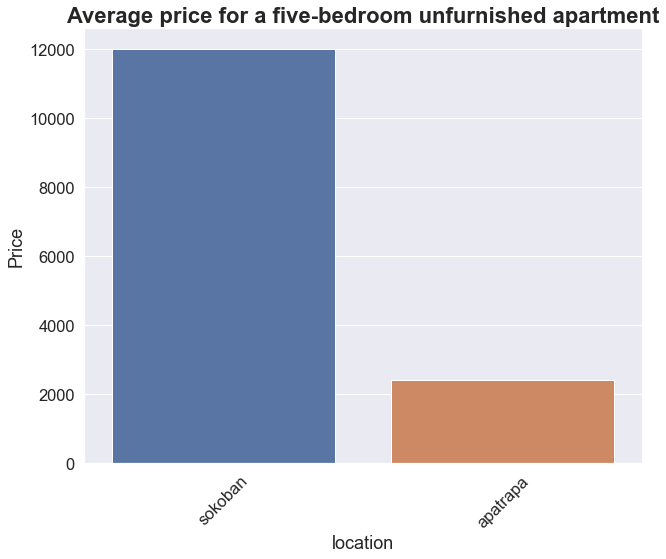

In [48]:
x_axis,y_axis=avg_price_unfurnished_for_five_bedroom.location,avg_price_unfurnished_for_five_bedroom['price(cedis)']
plt.figure(figsize=(10,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for a five-bedroom unfurnished apartment",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average cost of rent for suburbs with at least five appearance in the dataset
* Kronum has the highest average price of 1190 per month for a two bedroom apartment with a bathroom.
* Kotei has the cheapest with and average price of 338 cedi per month a one bedroom with one bathroom. <br>
<br>

In [51]:
location_stat=kumasi_df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_less_than_5=location_stat[location_stat<5]
kumasi_df['new_location']=kumasi_df['location'].apply(lambda x: 'other' if x in location_less_than_5 else x)


In [53]:
ksi_avg_unfurnished1=pd.DataFrame(unfurnished_ksi[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['new_location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
ksi_avg_unfurnished1.reset_index(inplace=True)
ksi_avg_unfurnished1

,new_location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,kronum,1190,2,1,374
1,tech,1102,2,2,167
2,daban,991,2,2,40
3,other,871,2,1,47
4,santasi,831,1,1,26
5,tanoso,807,1,1,29
6,kokoben,805,2,2,28
7,kwadaso,764,2,2,21
8,atonsu,505,2,1,378
9,gyinyase,504,2,1,104


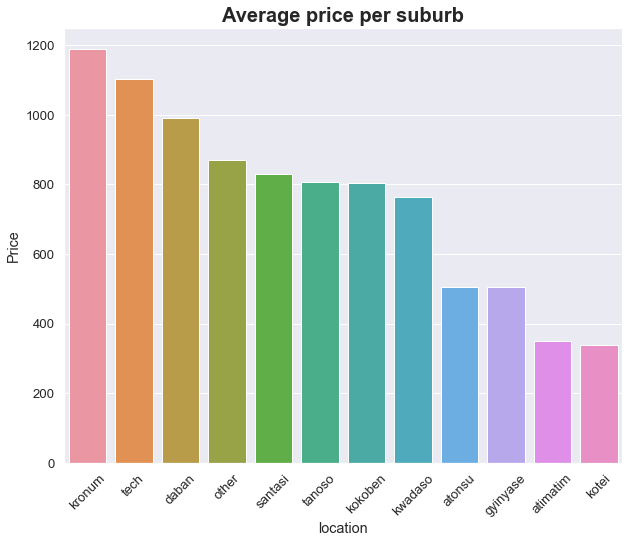

In [56]:
x_axis,y_axis=ksi_avg_unfurnished1.new_location,ksi_avg_unfurnished1['price(cedis)']
plt.figure(figsize=(10,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

# Both furnished and unfurnished 
The overall average rent price for each suburb is given below with,
* Ridge being the most expensive suburb in Kumasi with an average rent price of 16,767 cedis per month
* Ayigya being the most affordable suburb in Kumasi with and average rent price of 110 cedis per month

In [57]:
ksi_avg_df=pd.DataFrame(kumasi_df[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    kumasi_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
ksi_avg_df.reset_index(inplace=True)
ksi_avg_df

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,ridge,16767,3,4,83
1,danyame,4833,3,3,100
2,sokoban,4216,2,2,106
3,ahodwo,3750,2,2,59
4,kenyasi,1400,3,3,11
5,parakuo,1200,2,1,100
6,kronum,1190,2,1,374
7,tech,1102,2,2,167
8,spe,1000,4,3,10
9,daban,991,2,2,40


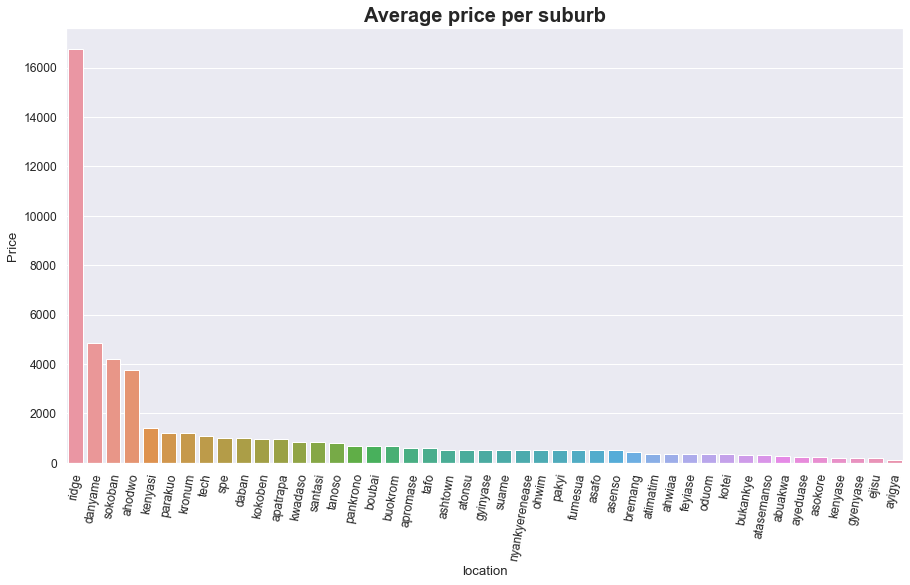

In [59]:
x_axis,y_axis=ksi_avg_df.location,ksi_avg_df['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.1) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=80)
plt.show(fig)

##  Most frequent number of bedrooms in each suburb
In the cell below, the table shows the number of a bedroom type in each suburb in Kumasi.<br>
For instance,
* Abuakwa has 2 one-bedroom aapartment and 2 three-bedroom apartments
* Atimtim has 9 one-bedroom aapartment,5 two-bedroom apartments, 3 three-bedroom apartments and 1 four-bedroom apartments

In [60]:
ksi_count_df=pd.crosstab(kumasi_df['location'],kumasi_df['no_bedrooms'],margins=False)
ksi_count_df

no_bedrooms,1,2,3,4,5
location,,,,,
abuakwa,2,0,2,0,0
ahodwo,0,2,0,0,0
ahwiaa,0,1,0,0,0
apatrapa,2,0,1,0,1
apromase,0,0,1,0,0
asafo,0,1,0,0,0
asenso,0,1,0,0,0
ashtown,1,0,1,0,0
asokore,2,0,0,0,0


## Suburb with the highest one-bedroom apartment
* Tech has the highest number of one bedroom apartments in Kumasi with 9 apartments
* Kenyase and Sokoban have the least number of one bedroom apartments. Both with one apartments.

In [61]:
one_bed=pd.DataFrame(kumasi_df[(kumasi_df['no_bedrooms']==1)& (kumasi_df['location']!='kumasi')])
one_bedroom=one_bed.groupby('location')['location'].agg('count').sort_values(ascending=False)
one_bedroom_more_than2=one_bedroom[one_bedroom>2]
one_bedroom

location
santasi       12
tech          10
kwadaso        9
atimatim       9
kotei          4
kokoben        3
atonsu         3
tanoso         2
apatrapa       2
asokore        2
ayeduase       2
ayigya         2
abuakwa        2
gyinyase       2
feyiase        1
ejisu          1
bukankye       1
gyenyase       1
kenyase        1
kronum         1
atasemanso     1
oduom          1
ashtown        1
sokoban        1
fumesua        1
Name: location, dtype: int64

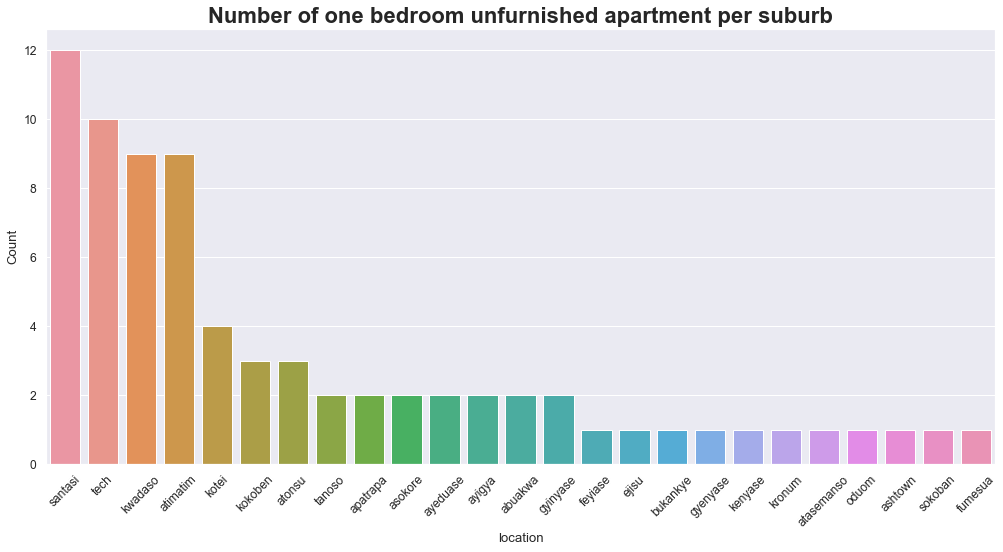

In [62]:
x_axis,y_axis=one_bedroom.index,one_bedroom.values
plt.figure(figsize=(17,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of one bedroom unfurnished apartment per suburb",weight='bold').set_fontsize('22')
plt.xlabel('location')
plt.ylabel('Count')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Suburb with the hishest two-bedroom apartment
* Kwadaso has the highest number of two bedroom apartments in Kumasi with eleven apartments
* Kotei, Ahwiaa and Asafo have the least number of one bedroom apartments. Both with one apartments.

In [63]:
two_bed=pd.DataFrame(kumasi_df[(kumasi_df['no_bedrooms']==2) & (kumasi_df['location']!='kumasi')])
two_bedroom=two_bed.groupby('location')['location'].agg('count').sort_values(ascending=False)
two_bedroom_more_than2=two_bedroom[two_bedroom>2]
two_bedroom#_more_than2

location
kwadaso           11
santasi           10
tech               9
kronum             7
atimatim           5
atonsu             5
tanoso             4
daban              3
kokoben            3
gyinyase           2
ahodwo             2
ohwim              2
nyankyerenease     1
pakyi              1
parakuo            1
bremang            1
ayeduase           1
sokoban            1
tafo               1
asenso             1
asafo              1
ahwiaa             1
kotei              1
Name: location, dtype: int64

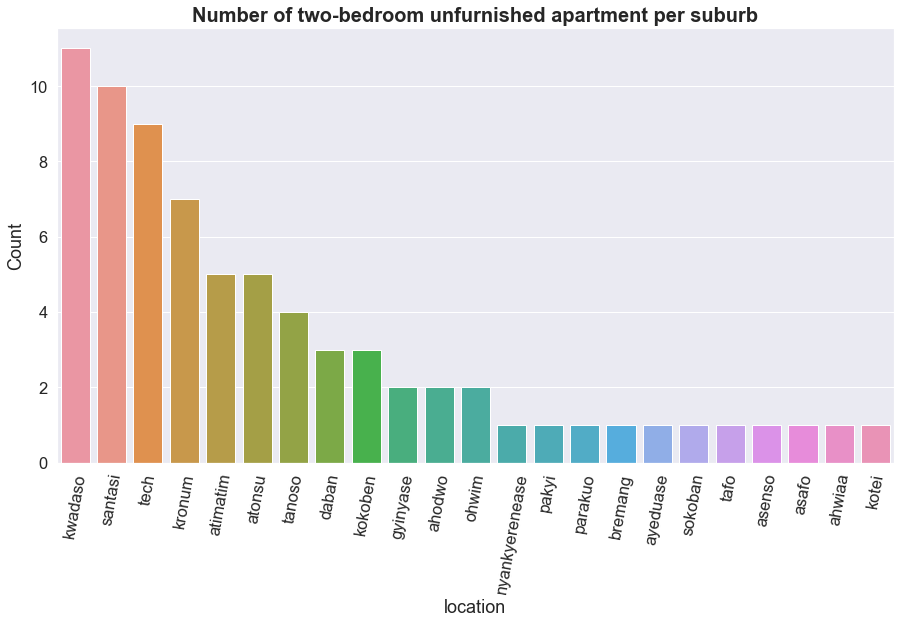

In [64]:
x_axis,y_axis=two_bedroom.index,two_bedroom.values#_more_than2
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of two-bedroom unfurnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Count')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=80)
plt.show(fig)

## Suburb with the hishest number of three-bedroom apartment
* Tech has the highest number of three bedroom apartments in Kumasi with seventeen apartments
* Apromase, Apatrapa and Ashtown have the least number of three bedroom apartments. Both with one apartments.

In [65]:
three_bed=pd.DataFrame(kumasi_df[kumasi_df['no_bedrooms']==3])
three_bedroom=three_bed.groupby('location')['location'].agg('count').sort_values(ascending=False)
three_bedroom_more_than1=three_bedroom[three_bedroom>1]
three_bedroom

location
tech        17
santasi      7
kwadaso      5
kokoben      4
atonsu       4
atimatim     3
buokrom      2
daban        2
gyinyase     2
kronum       2
abuakwa      2
kotei        1
kenyasi      1
tanoso       1
danyame      1
pankrono     1
boubai       1
ridge        1
suame        1
ashtown      1
apromase     1
apatrapa     1
Name: location, dtype: int64

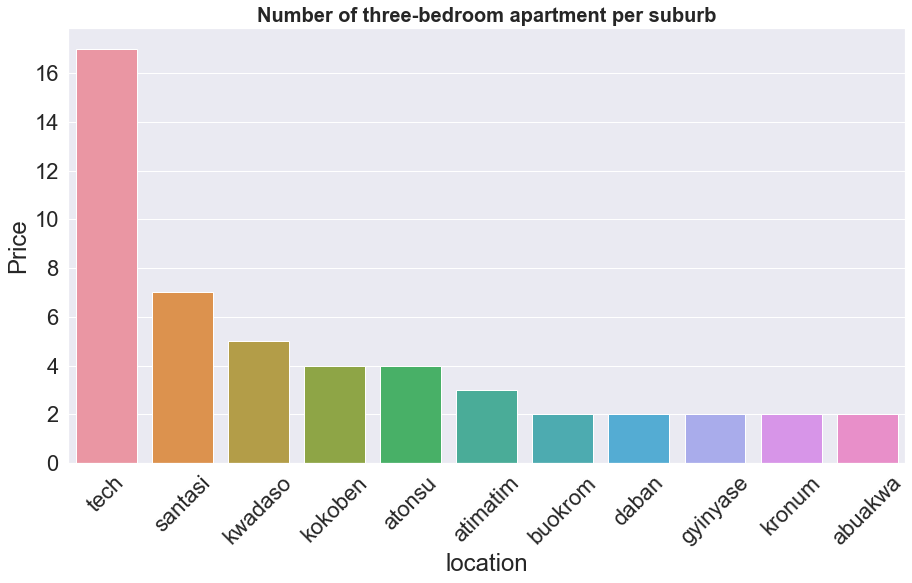

In [66]:
x_axis,y_axis=three_bedroom_more_than1.index,three_bedroom_more_than1.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of three-bedroom apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Suburb with the hishest number of four-bedroom apartment
* Kwadaso has the highest number of four bedroom apartments in Kumasi with 6 apartments
* Daban, Kotei and Spe have the least number of four bedroom apartments. Both with one apartments.

In [67]:
four_bed=pd.DataFrame(kumasi_df[(kumasi_df['no_bedrooms']==4) & (kumasi_df['location']!='kumasi')])
four_bedroom=four_bed.groupby('location')['location'].agg('count').sort_values(ascending=False)
#four_bedroom#_more_than2=two_bedroom[two_bedroom>2]
four_bedroom

location
kwadaso     6
kenyasi     2
danyame     2
tech        1
spe         1
kotei       1
daban       1
atimatim    1
Name: location, dtype: int64

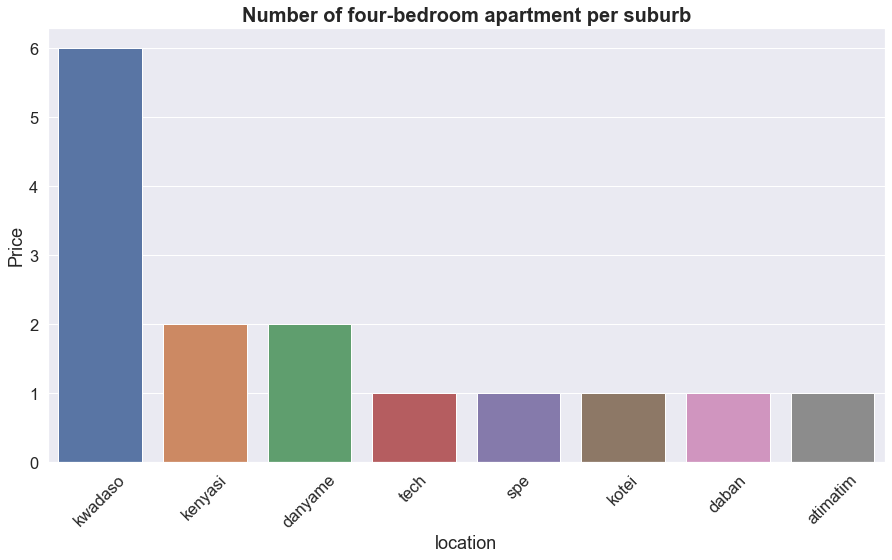

In [68]:
x_axis,y_axis=four_bedroom.index,four_bedroom.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of four-bedroom apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

# ACCRA DATASET ANALYSIS
The analysis of the Kumasi dataset is as follows
* The data was categorized into furnished and unfurnished apartments.
* The average price of an apartment is analyzed under this heading
* The most frequent number of bedroom aprtment for each suburb is also analyzed
<br>
<br>

## Data Exploration
The dataset set contains a total of 3508 apartments; out of which 326 are furnished
<br>
<br>

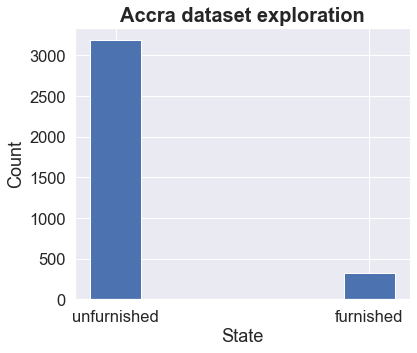

In [69]:
furnished_grouping_accra=accra_df.groupby('furnished')['furnished'].agg('count').sort_values(ascending=False)

x_axis,y_axis=furnished_grouping_accra.index,furnished_grouping_accra.values
plt.figure(figsize=(6,5))
plt.bar(x_axis, y_axis, width=0.2);
#fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Accra dataset exploration",weight='bold').set_fontsize('20')
plt.xlabel('State')
plt.ylabel('Count')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## Distribution of furnished state for the various bedroom type
* There exist a total of 1400 one-bedroom apartment out of which 92 is furnished
* A total of 1330 two-bedroom apartment with 141 furnished
* There are 671 three-bedroom apartments with 86 furnished
<br>

In [70]:
accra_furnished=pd.crosstab(accra_df['no_bedrooms'],accra_df['furnished'],margins=False)
accra_furnished.reset_index(inplace=True)
accra_furnished

furnished,no_bedrooms,furnished,unfurnished
0,1,92,1308
1,2,141,1189
2,3,86,585
3,4,7,86
4,5,0,12
5,6,0,2


In [71]:
bedroom_accra=accra_df.groupby('no_bedrooms')['no_bedrooms'].agg('count').sort_values(ascending=False)
accra_bedroom=pd.DataFrame(bedroom_accra)
accra_bedroom.rename(columns={'no_bedrooms':'Count'},inplace=True)
accra_bedroom.reset_index(inplace=True)
accra_bedroom

,no_bedrooms,Count
0,1,1400
1,2,1330
2,3,671
3,4,93
4,5,12
5,6,2


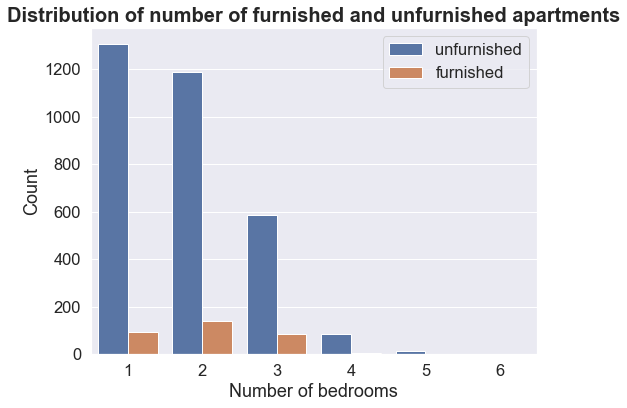

In [72]:
x_axis,y_axis=bedroom_accra.index,bedroom_accra.values
plt.figure(figsize=(8,6))
fig = sns.countplot(x="no_bedrooms", hue="furnished", data=accra_df)
#fig=rr.plot(kind='bar')
plt.title("Distribution of number of furnished and unfurnished apartments",weight='bold').set_fontsize('20')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.legend(loc='upper right')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## Distribution of Price
The distribution of the price is heavily skewed towards the right. This means there are few houses with<br>
very high prices pulling the mean towards the right. <br>
Most of the aparments have rent price less than 5000 cedis per month

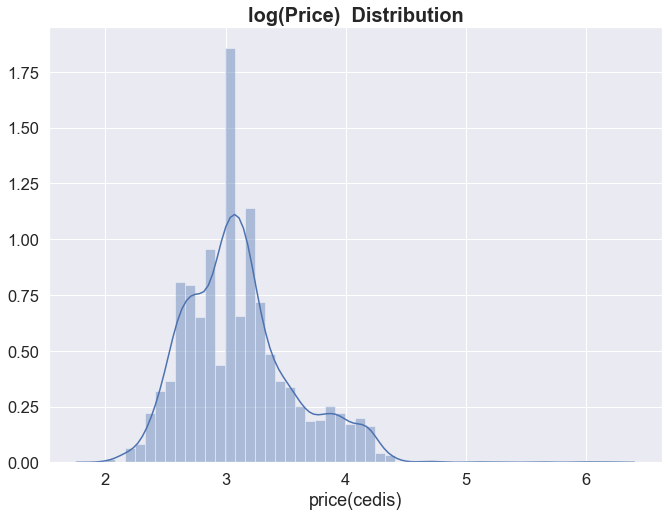

In [76]:
plt.figure(figsize=(11,8))
fig = sns.distplot(np.log10(accra_df['price(cedis)']))
plt.title("log(Price)  Distribution",weight='bold').set_fontsize('20')
sns.set(font_scale=1.5) 
plt.show(fig)

## Average rent price per suburb

In [77]:
accra_avg_df=pd.DataFrame(accra_df[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
accra_avg_df.reset_index(inplace=True)
accra_avg_df

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,osu,63675,1,2,3331
1,kanda estate,16500,2,3,278
2,cantonments,13994,2,2,237
3,ridge,13626,2,2,251
4,north ridge,12200,2,2,220
...,...,...,...,...,...
60,teshie estates,475,1,1,100
61,nungua,461,1,1,99
62,ashongman,350,1,1,12
63,lartebiokorshie,320,1,1,100


In [78]:
bedroom_accra=accra_df.groupby('no_bedrooms')['no_bedrooms'].agg('count').sort_values(ascending=False)
accra_bedroom=pd.DataFrame(bedroom_accra)
accra_bedroom.rename(columns={'no_bedrooms':'Count'},inplace=True)
accra_bedroom.reset_index(inplace=True)
accra_bedroom

,no_bedrooms,Count
0,1,1400
1,2,1330
2,3,671
3,4,93
4,5,12
5,6,2


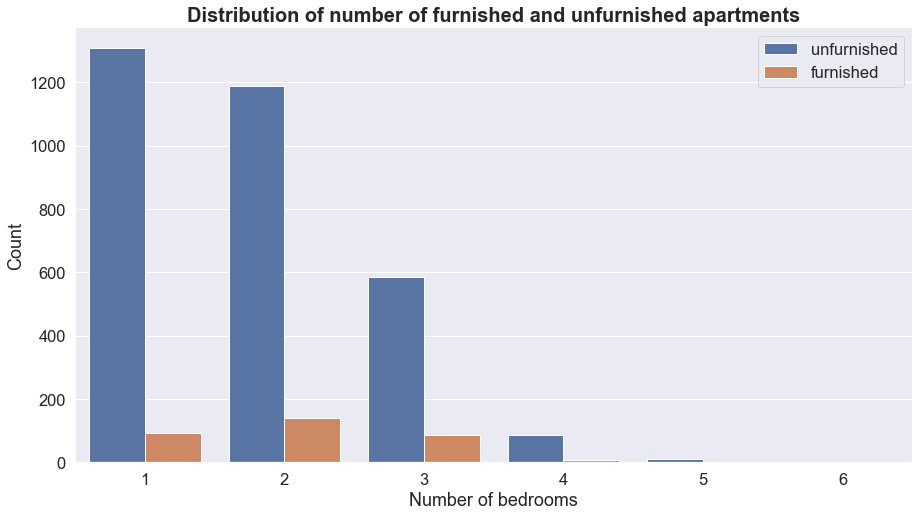

In [79]:
x_axis,y_axis=bedroom_accra.index,bedroom_accra.values
plt.figure(figsize=(15,8))
fig = sns.countplot(x="no_bedrooms", hue="furnished", data=accra_df)
#fig=rr.plot(kind='bar')
plt.title("Distribution of number of furnished and unfurnished apartments",weight='bold').set_fontsize('20')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.legend(loc='upper right')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

## FURNISHED APPARTMENTS ANALYSIS
* Kanda Estate has the highest average price; 15,500 cedis for a furnished 3 bedroom apartment  
* Darkuman has the least average price for a furnihed apartment

In [80]:
furnished_accra=pd.DataFrame(accra_df[accra_df['furnished']=='furnished'])
furnished_accra['furnished'].replace({'furnished':1,'unfurnished':0},inplace=True)

#furnished_accra['location'].unique()
accra_avg_furnished=pd.DataFrame(furnished_accra[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
accra_avg_furnished.reset_index(inplace=True)
accra_avg_furnished

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,kanda estate,16500,2,3,278
1,cantonments,14243,2,2,209
2,airport,13383,2,2,702
3,ridge,13160,2,2,202
4,north ridge,11799,2,2,218
5,mccarthy hill,10800,2,2,100
6,labone,9439,1,2,305
7,osu,8998,1,1,229
8,dzorwulu,7722,2,2,225
9,east legon,7720,2,2,341


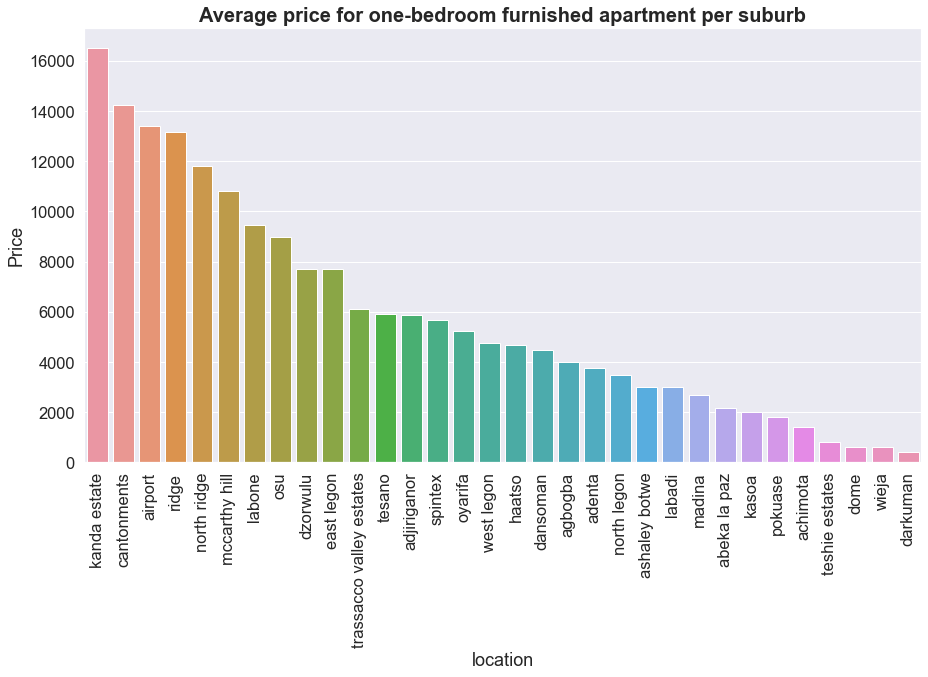

In [81]:
x_axis,y_axis=accra_avg_furnished.location,accra_avg_furnished['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for one-bedroom furnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## Average price for one-bedroom furnished  apartment
* Cantoments has the highest average price (10120 cedis) for a furnished 1 bedroom apartment  
* Darkuman has the least average price (400) for a 1 bedroom furnihed apartment

In [82]:
furnished_for_one_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==1])
avg_price_furnished_for_one_bedroom=pd.DataFrame(furnished_for_one_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_furnished_for_one_bedroom.reset_index(inplace=True)
avg_price_furnished_for_one_bedroom

<ipython-input-82-fe53ad12c967>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  furnished_for_one_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==1])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,cantonments,10120,1,1,100
1,osu,8280,1,1,50
2,airport,7243,1,1,159
3,trassacco valley estates,7000,1,1,90
4,east legon,4456,1,1,319
5,dzorwulu,4320,1,1,50
6,labone,3498,1,1,13
7,adenta,3400,1,1,50
8,spintex,3275,1,1,384
9,haatso,3100,1,1,1


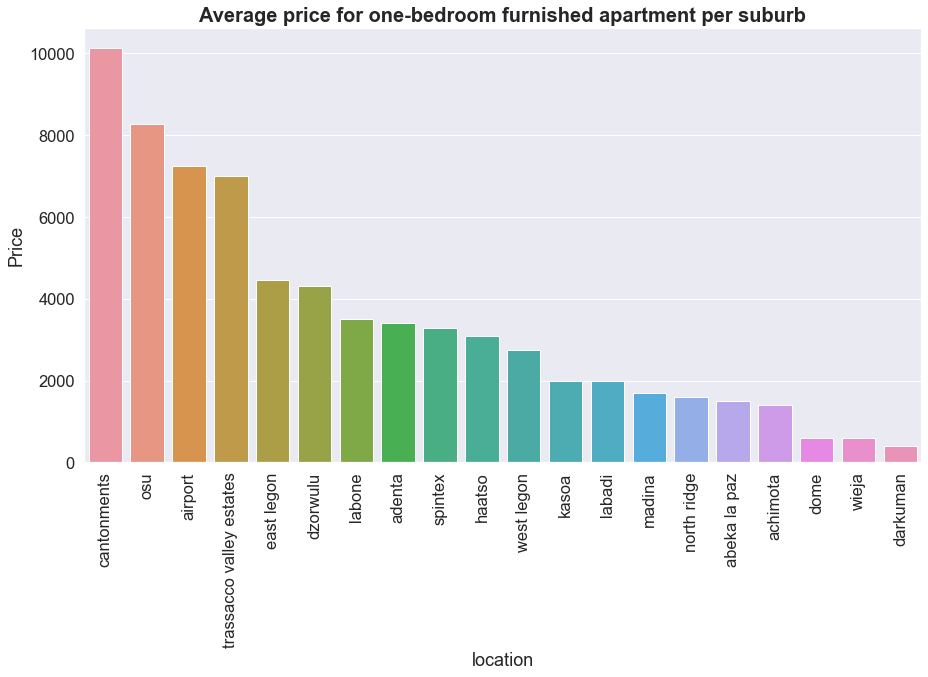

In [83]:
x_axis,y_axis=avg_price_furnished_for_one_bedroom.location,avg_price_furnished_for_one_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for one-bedroom furnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## Average price for two bedroom furnished apartment per suburb

In [84]:
furnished_for_two_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==2])
avg_price_furnished_for_two_bedroom=pd.DataFrame(furnished_for_two_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_furnished_for_two_bedroom.reset_index(inplace=True)
avg_price_furnished_for_two_bedroom

<ipython-input-84-052b8c4d525f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  furnished_for_two_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==2])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,kanda estate,16500,2,3,278
1,north ridge,13474,2,2,100
2,cantonments,12792,2,2,239
3,ridge,11500,2,2,120
4,labone,11420,2,2,402
5,mccarthy hill,10800,2,2,100
6,osu,9118,2,2,259
7,east legon,7648,2,2,320
8,airport,7439,2,2,1646
9,dzorwulu,7257,2,1,331


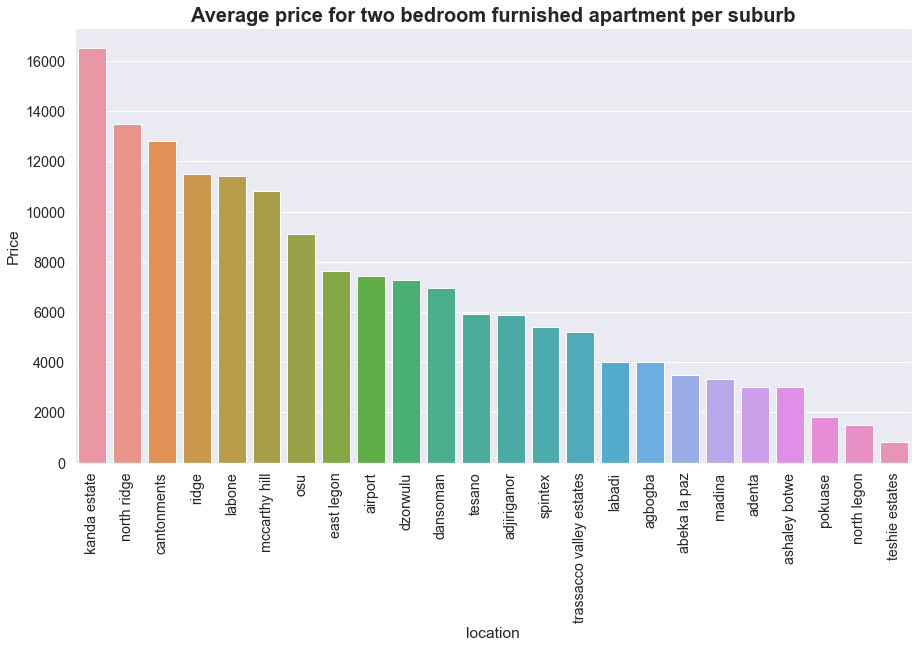

In [85]:
x_axis,y_axis=avg_price_furnished_for_two_bedroom.location,avg_price_furnished_for_two_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two bedroom furnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## Average price for three bedroom furnished apartment per suburb

In [86]:
furnished_for_three_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==3])
avg_price_furnished_for_three_bedroom=pd.DataFrame(furnished_for_three_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_furnished_for_three_bedroom.reset_index(inplace=True)
avg_price_furnished_for_three_bedroom

<ipython-input-86-d89bdc14fba2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  furnished_for_three_bedroom=pd.DataFrame(furnished_accra[accra_df['no_bedrooms']==3])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,cantonments,17100,3,2,188
1,airport,15726,3,3,398
2,ridge,14820,3,3,285
3,north ridge,13512,3,3,327
4,dzorwulu,11233,3,2,60
5,east legon,11042,3,3,313
6,spintex,10365,3,3,388
7,oyarifa,7000,3,3,132
8,west legon,6800,3,3,468
9,haatso,6270,3,3,500


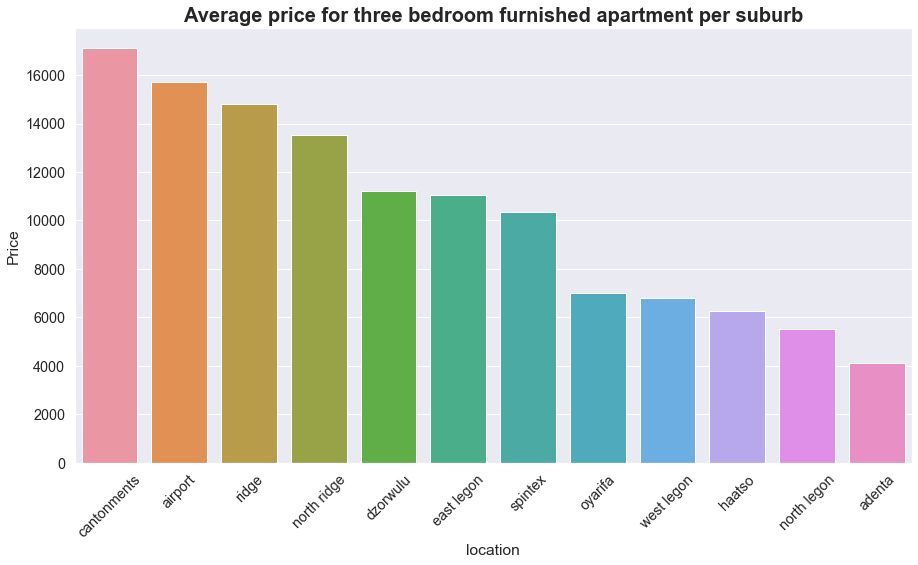

In [87]:
x_axis,y_axis=avg_price_furnished_for_three_bedroom.location,avg_price_furnished_for_three_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for three bedroom furnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## UNFURNISHED APARTMENTS IN ACCRA

In [95]:
unfurnished_accra=pd.DataFrame(accra_df[accra_df['furnished']=='unfurnished'])
#furnished_accra['location'].unique()
accra_avg_unfurnished=pd.DataFrame(unfurnished_accra[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
accra_avg_unfurnished.reset_index(inplace=True)
accra_avg_unfurnished

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,osu,84938,1,2,4537
1,kanda estate,16500,2,3,278
2,ridge,14560,3,3,350
3,cantonments,13890,2,2,248
4,north ridge,12602,2,2,222
...,...,...,...,...,...
60,nungua,461,1,1,99
61,ashongman,350,1,1,12
62,lartebiokorshie,320,1,1,100
63,chorkor,300,1,1,2657


## Average price for one bedroom unfurnished apartment per suburb

In [96]:
unfurnished_for_one_bedroom=pd.DataFrame(unfurnished_accra[unfurnished_accra['no_bedrooms']==1])
avg_price_unfurnished_for_one_bedroom=pd.DataFrame(unfurnished_for_one_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_one_bedroom.reset_index(inplace=True)
one_bed_top_10=avg_price_unfurnished_for_one_bedroom.iloc[:10]
one_bed_top_10

,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,labone,10430,1,1,18
1,cantonments,7900,1,1,67
2,airport,5192,1,1,758
3,dzorwulu,2272,1,1,297
4,abelemkpe,1696,1,1,36
5,tesano,1582,1,1,45
6,adjiriganor,1383,1,1,34
7,east legon,1263,1,1,1154
8,osu,1143,1,1,10004
9,north legon,1011,1,1,184


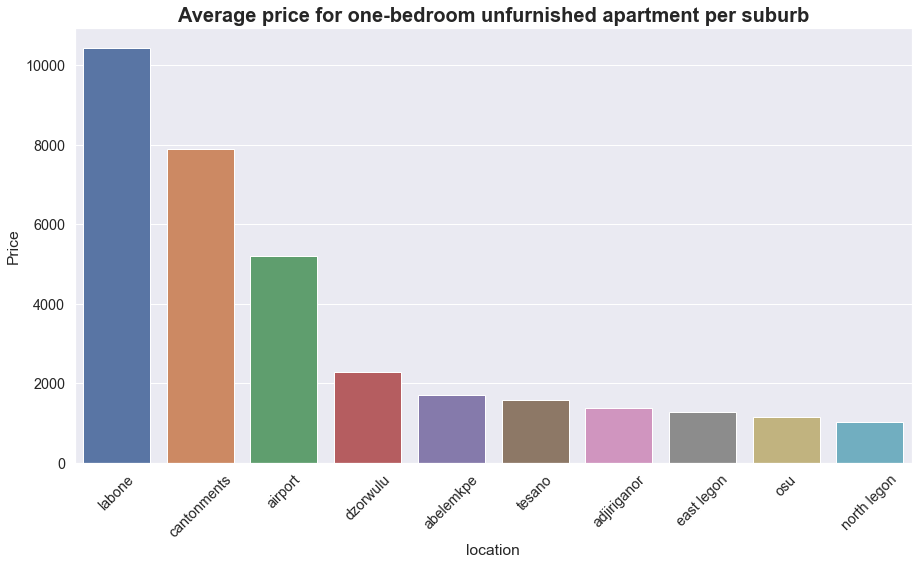

In [98]:
x_axis,y_axis=one_bed_top_10.location,one_bed_top_10['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for one-bedroom unfurnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average price of two bedroom unfurnished apartment¶
* Kanda estate has the highest average rent price for a two-bedroom unfurnished apartment
* Teshie is the suburb with the Cheapest rent price of a two-bedroom unfurnished apartment

In [107]:
unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_accra[(accra_df['no_bedrooms']==2) & (accra_df['location']!='osu')])
avg_price_unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_for_two_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_two_bedroom.reset_index(inplace=True)
two_bed_top_10=avg_price_unfurnished_for_two_bedroom.iloc[:10]
avg_price_unfurnished_for_two_bedroom

<ipython-input-107-ce9de781e323>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_two_bedroom=pd.DataFrame(unfurnished_accra[(accra_df['no_bedrooms']==2) & (accra_df['location']!='osu')])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,kanda estate,16500,2,3,278
1,cantonments,13404,2,2,243
2,labone,11300,2,2,169
3,north ridge,7207,2,2,63
4,south la,6000,2,3,9
5,north legon,5388,2,2,240
6,nima,4250,2,2,180
7,airport,4227,2,2,911
8,dzorwulu,3660,2,1,485
9,east legon,2893,2,2,376


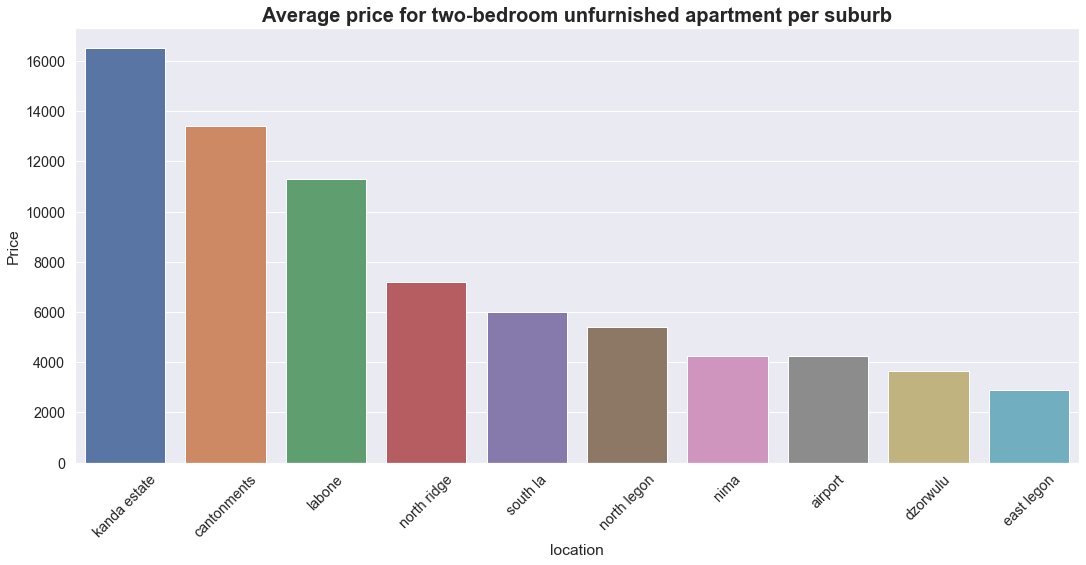

In [108]:
x_axis,y_axis=two_bed_top_10.location,two_bed_top_10['price(cedis)']
plt.figure(figsize=(18,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two-bedroom unfurnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average price for three bedroom unfurnished apartment¶¶

In [109]:
unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_accra[accra_df['no_bedrooms']==3])
avg_price_unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_for_three_bedroom[['price(cedis)','no_bedrooms','no_bathrooms','area(sqm)']].groupby(
    accra_df['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_unfurnished_for_three_bedroom.reset_index(inplace=True)
three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
three_bed_top_10
#& (accra_df['location']!='osu')

<ipython-input-109-5f9c5cd6846a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unfurnished_for_three_bedroom=pd.DataFrame(unfurnished_accra[accra_df['no_bedrooms']==3])


,location,price(cedis),no_bedrooms,no_bathrooms,area(sqm)
0,tesano,15500,3,2,150
1,north ridge,14760,3,3,286
2,ridge,14560,3,3,350
3,cantonments,13705,3,3,260
4,ashaley botwe,12546,3,2,283
5,airport,10846,3,3,353
6,osu,10726,3,3,338
7,abelemkpe,7720,3,2,143
8,dzorwulu,7577,3,3,1025
9,adabraka,7100,3,3,146


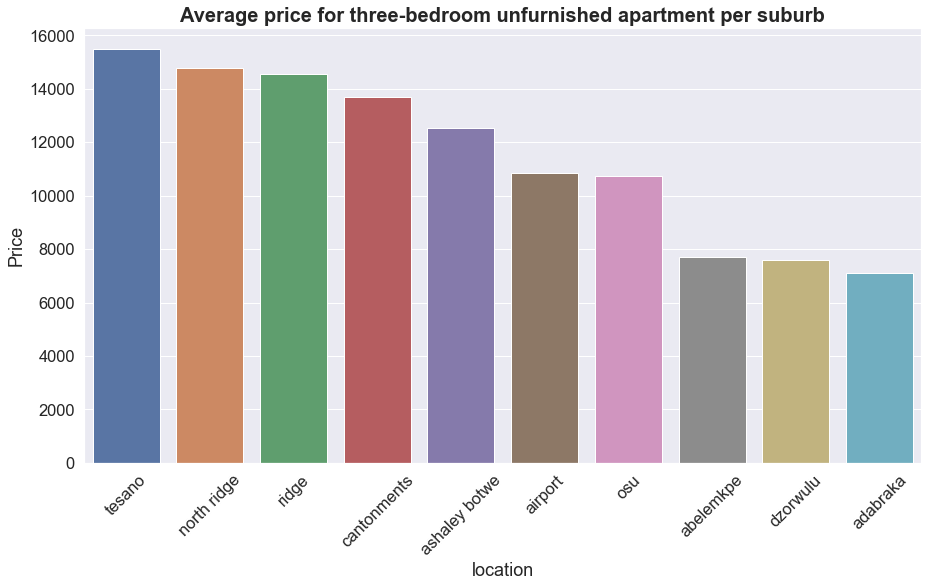

In [110]:
x_axis,y_axis=three_bed_top_10.location,three_bed_top_10['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for three-bedroom unfurnished apartment per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

# HOUSE FOR SALE

In [111]:
df_housing=pd.read_csv('tonaton_housing.csv')

## Cleaning dataset

In [112]:
df_housing.rename(columns={'Price':'price(cedis)','Title':'title'},inplace=True)
#df_housing.head()

In [113]:
def clean(data):
    data_obj=data.select_dtypes(['object'])
    data[data_obj.columns]=data_obj.apply(lambda x:x.str.strip())
    #data['price']=data['price'].str.replace(r'[^\d.]+','')
    #df['area']=df['area'].str.replace(r'[^\d.]+','')
    data['title']=data['title'].str.lower()
    data['Description']=data['Description'].str.lower()
    
       
    data['price(cedis)']=data['price(cedis)'].str.replace(r'[^\d.]+','')#.astype(int)
    data['place']=data['Description'].str.replace(', houses','')
    
    
    data['suburb']=[re.sub(r'.*@', ' ', str(i)) for i in data['title']]
    data['suburb']=[re.sub(r'.*at ', ' ', str(i)) for i in data['suburb']]
    data['suburb']=[re.sub(r'.*in ', ' ', str(i)) for i in data['suburb']]
    
    
clean(df_housing)

beds=df_housing['Content'].str.split(',',expand=True)
beds[0]=beds[0].str.replace(r'[^\d.]+','').astype(int)
beds[1]=beds[1].str.replace(r'[^\d.]+','').astype(int)
beds.rename(columns={0:'no_bedrooms',1:'no_bathrooms'},inplace=True)
housing=df_housing.merge(beds,left_index=True, right_index=True)
housing['price(cedis)']=housing['price(cedis)'].astype(float)


# Distribution of locations in the housing dataset
From the graph, Accra and Kumasi have the highest number of houses

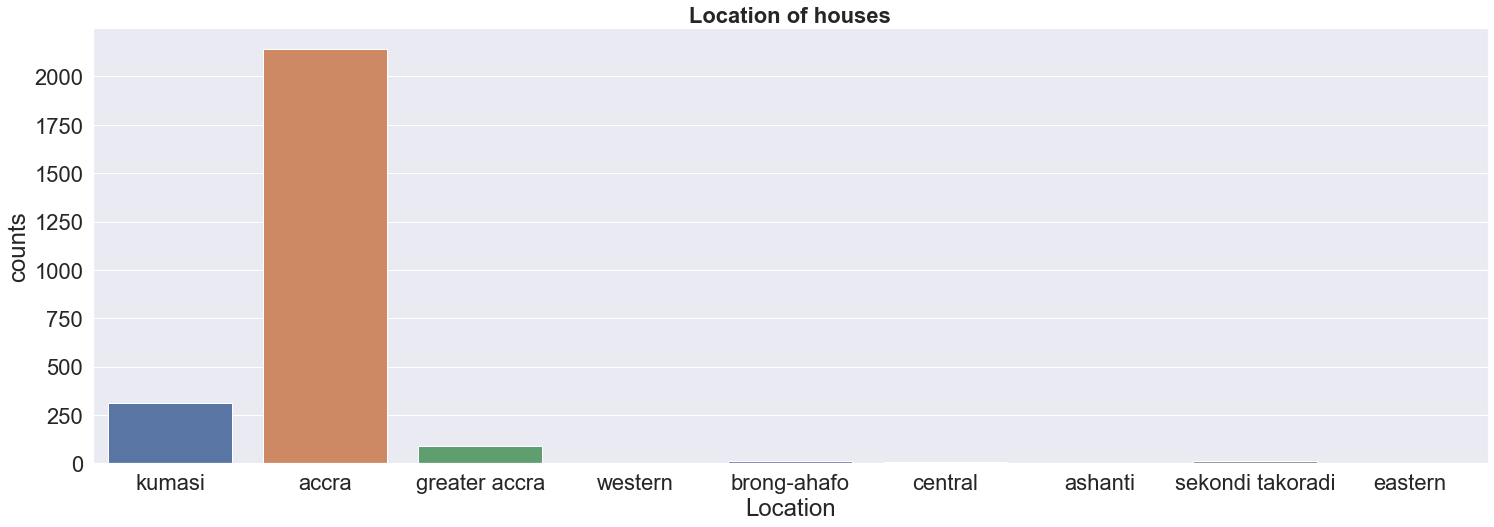

In [116]:
collect = collections.Counter(housing['place'])
plt.figure(figsize=(25,8))
fig = sns.barplot(list(collect.keys()),list(collect.values()))
plt.title("Location of houses",weight='bold').set_fontsize('22')
plt.xlabel('Location')
plt.ylabel('counts')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

In [117]:
housing_1=housing[['title','price(cedis)','no_bedrooms','no_bathrooms','suburb','place']]
def clean1(data):
    data_obj=data.select_dtypes(['object'])
    data[data_obj.columns]=data_obj.apply(lambda x:x.str.strip())
clean1(housing_1)


kumasi_housing=pd.DataFrame(housing_1[housing_1['place']=='kumasi'])
accra_housing=pd.DataFrame(housing_1[housing_1['place']=='accra'])
kumasi_housing.reset_index(inplace=True,drop=True)
accra_housing.reset_index(inplace=True,drop=True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]



# KUMASI HOUSING FOR SALE ANALYSIS

In [118]:
suburb=list(kumasi_housing['suburb'])

for element in range(len(suburb)):
    

    if 'ejisu' in suburb[element]:
        suburb[element]='ejisu'
        
    elif 'daban ' in suburb[element] or 'opokukrom' in suburb[element]:
        suburb[element]='daban' 
    
    elif 'kronum' in loc[element] or 'kronom' in suburb[element] or 'krunom' in suburb[element] or 'afrancho' in suburb[element] or 'kronum kumasi' in suburb[element] or 'newly built' in suburb[element]:
        suburb[element]='kronum' 
        
    elif 'bosore' in suburb[element] or 'kenyasi' in suburb[element]:
        suburb[element]='kenyasi' 
        
    elif 'bouban' in suburb[element] or 'parkoso' in suburb[element] or 'asokore' in suburb[element] or 'paakoso' in suburb[element]:
        suburb[element]='asokore mampong'     
       
    elif 'agric-kwawoman' in suburb[element] or 'kwadaso' in suburb[element] or 'ohwimase' in suburb[element] or 'agric kromoase' in suburb[element]:
        suburb[element]='kwadaso'   
        
    elif 'kokoso' in suburb[element] or 'kokoben' in suburb[element] or 'obuase' in suburb[element] or 'trede, kumasi' in suburb[element]:
        suburb[element]='kokoben' 
        
    elif 'ampaame' in suburb[element] or 'abrepo' in suburb[element] :
        suburb[element]='bohyen' 
    
    elif 'buokrom' in suburb[element] or 'boukrom' in suburb[element]:
        suburb[element]='buokrom' 
    
    elif 'santasi' in suburb[element] or 'nkoranza' in suburb[element] or 'am for sale' in suburb[element] or 'es' in suburb[element] or 'anyinam' in suburb[element] :
        suburb[element]='santasi' 
        
    elif 'nkoranza' in suburb[element] or 'tuc' in suburb[element] or 'ahojo' in suburb[element] or 'ahodwo' in suburb[element] or 'kumasi nkoransa near special ice co. ltd' in suburb[element]:
        suburb[element]='ahodwo' 
    
    elif 'asomanso' in suburb[element] or 'asemanso' in suburb[element] or 'asemaso' in suburb[element]:
        suburb[element]='asemanso' 
    
    elif 'danyame' in suburb[element]:
        suburb[element]='danyame' 
        
    elif 'abuakwa' in suburb[element]:
        suburb[element]='abuakwa' 
    
    elif 'meduma' in suburb[element] or 'aboaso' in suburb[element]  or 'maase' in suburb[element] or 'fawoade' in suburb[element] or 'manponteng for sale' in suburb[element] or 'im' in suburb[element]:
        suburb[element]='mamponteng' 
    
    elif 'oduom' in suburb[element] or 'anwomaso' in suburb[element] or  'awomaso' in suburb[element]:
        suburb[element]='danyame' 
    
    elif 'apaaso' in suburb[element] or 'sokoban' in suburb[element] :
        suburb[element]='sokoban' 
        
    elif 'knust' in suburb[element] or 'tech' in loc[element] or 'teck' in suburb[element] or 'deduako' in suburb[element] or 'emena' in suburb[element] or 'boadi' in suburb[element] or 'tec kotei' in suburb[element]:
        suburb[element]='tech' 
        
    elif 'gyenyasi' in suburb[element] or 'feyiase' in suburb[element] or 'sewia' in suburb[element]  or 'onsu sawua' in suburb[element] or 'em' in suburb[element]:
        suburb[element]='feyiase' 
    
    elif 'appeadu' in suburb[element] or 'appiadu' in suburb[element] :
        suburb[element]='appiadu'
    
    else:    
        suburb[element]=suburb[element]
kumasi_housing['location']=suburb
kumasi_housing.drop(df.index[[49,46,19,277,298,306,15,64,172,228,254,237,
                             164,261,113,233,224,128,50,132,275]],inplace=True)

In [119]:
#kumasi_housing[kumasi_housing['location']=='accra, kokrobite']

## Average price of houses in each suburb

In [120]:
avg_kumasi_housing=pd.DataFrame(kumasi_housing[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    kumasi_housing['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)

avg_kumasi_housing.reset_index(inplace=True)
avg_kumasi_housing['location']=avg_kumasi_housing['location'].str.replace('kumasi','')
avg_kumasi_housing.head()

,location,price(cedis),no_bedrooms,no_bathrooms
0,konkromoase,3770000,10,10
1,asemanso,3313888,4,5
2,kwadaso,2957425,6,6
3,parakuo,2500000,6,7
4,tech,2229230,5,5


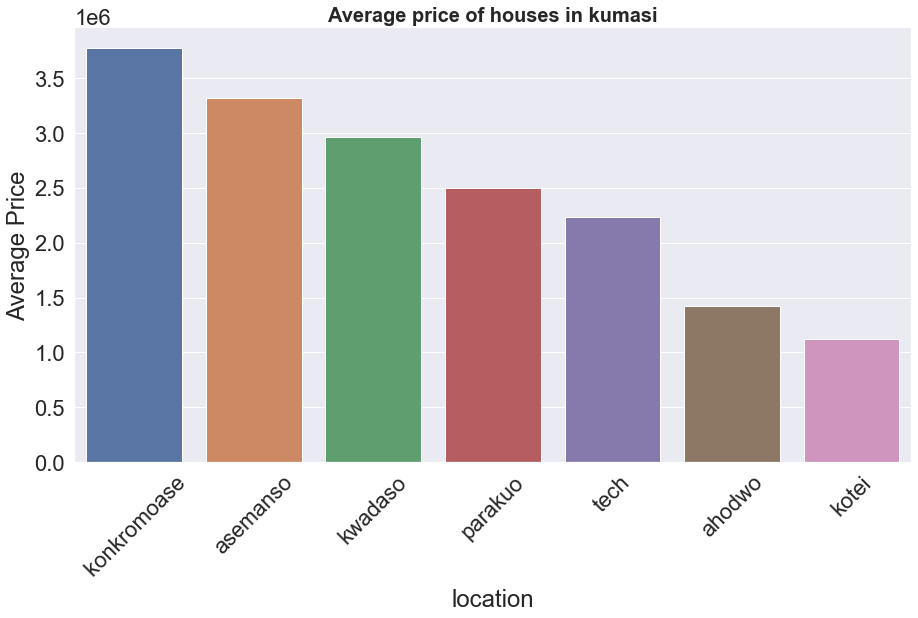

In [121]:
x_axis,y_axis=avg_kumasi_housing.location.iloc[:7],avg_kumasi_housing['price(cedis)'].iloc[:7]
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price of houses in kumasi",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Average Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Average price per number of bedrooms analysis

In [122]:
ksi_two_bedroom=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==2])
avg_price_ksi_two_bedroom=pd.DataFrame(ksi_two_bedroom[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    ksi_two_bedroom['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_ksi_two_bedroom.reset_index(inplace=True)
avg_price_ksi_two_bedroom
#three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
#three_bed_top_10
#& (accra_df['location']!='osu')

,location,price(cedis),no_bedrooms,no_bathrooms
0,daban,300000,2,2
1,feyiase,85000,2,2
2,ntensere,40000,2,1


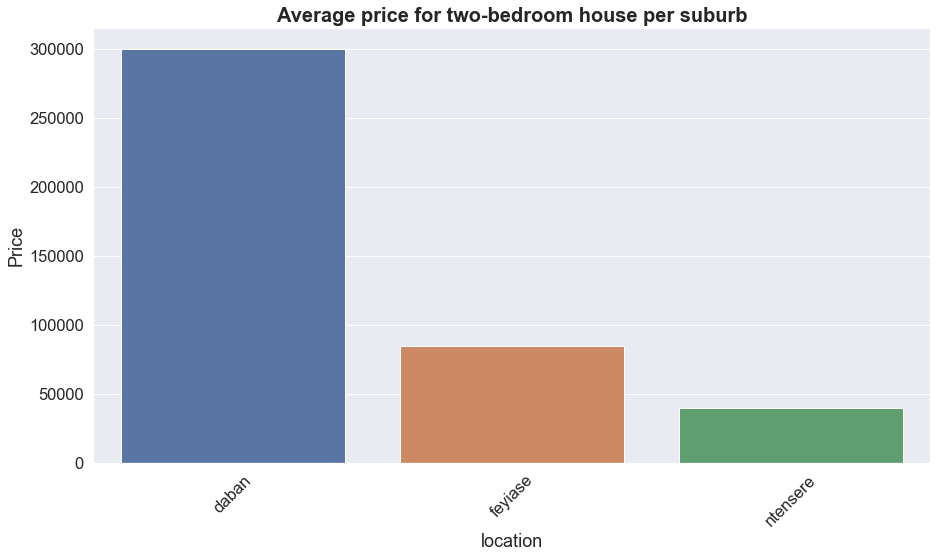

In [123]:
x_axis,y_axis=avg_price_ksi_two_bedroom.location,avg_price_ksi_two_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two-bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

# Three bedroom house

In [124]:
ksi_three_bedroom=pd.DataFrame(kumasi_housing[(kumasi_housing['no_bedrooms']==3) & (kumasi_housing['location']!='kumasi')])
avg_price_ksi_three_bedroom=pd.DataFrame(ksi_three_bedroom[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    ksi_three_bedroom['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_ksi_three_bedroom.reset_index(inplace=True)
avg_price_ksi_three_bedroom
#three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
#three_bed_top_10
#& (accra_df['location']!='osu')

,location,price(cedis),no_bedrooms,no_bathrooms
0,asemanso,750000,3,4
1,daban,650000,3,3
2,ayeduase,500000,3,2
3,sokoban,480000,3,3
4,kotwi,400000,3,3
5,kokoben,383333,3,3
6,santasi,356666,3,2
7,kronum,350000,3,3
8,"kronum, kumasi",350000,3,3
9,"asuofua adankwame, kumasi",260000,3,3


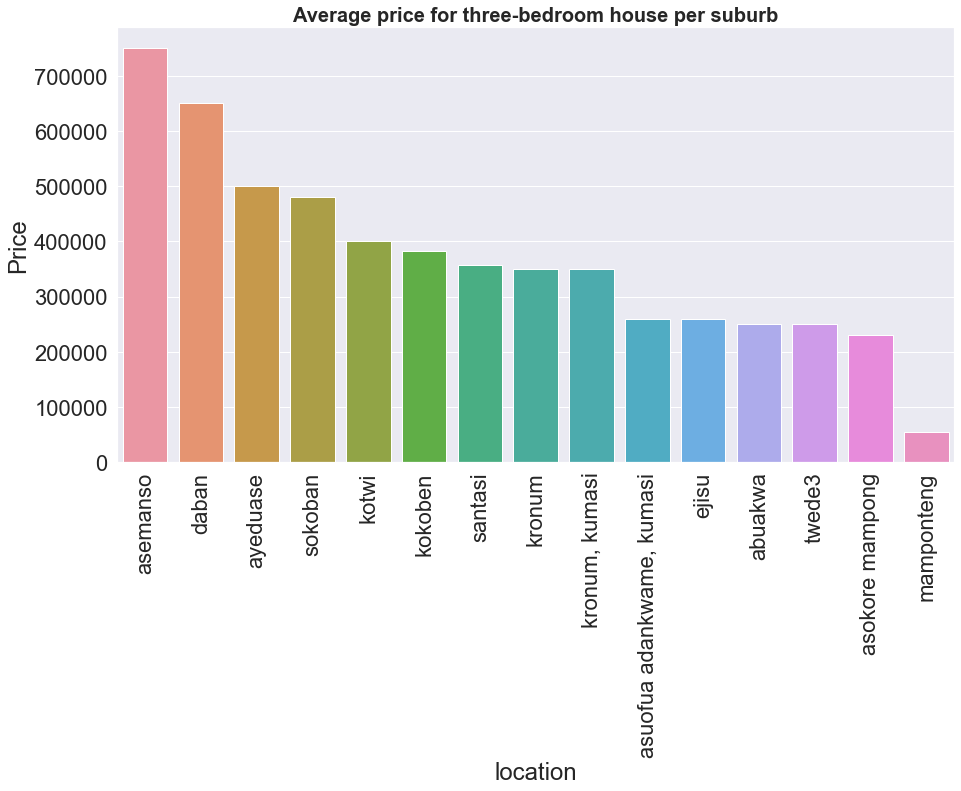

In [125]:
x_axis,y_axis=avg_price_ksi_three_bedroom.location,avg_price_ksi_three_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for three-bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Four bedroom house

In [126]:
ksi_four_bedroom=pd.DataFrame(kumasi_housing[(kumasi_housing['no_bedrooms']==4) & (kumasi_housing['location']!='asemanso')])
avg_price_ksi_four_bedroom=pd.DataFrame(ksi_four_bedroom[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    ksi_four_bedroom['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_ksi_four_bedroom.reset_index(inplace=True)
avg_price_ksi_four_bedroom
#three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
#three_bed_top_10
#& (accra_df['location']!='osu')

,location,price(cedis),no_bedrooms,no_bathrooms
0,danyame,3000000,4,4
1,ahodwo,1600000,4,4
2,kumasi,1025000,4,5
3,apeadu,650000,4,5
4,santasi,618473,4,4
5,sokoban,600000,4,4
6,daban,600000,4,4
7,ejisu,545000,4,4
8,kokoben,430000,4,4
9,buokrom,420000,4,4


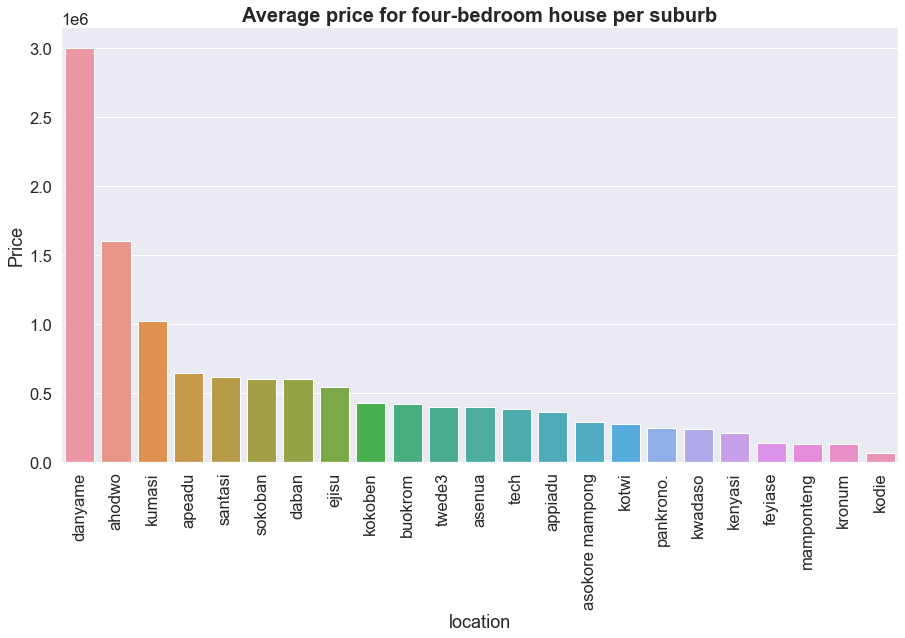

In [127]:
x_axis,y_axis=avg_price_ksi_four_bedroom.location,avg_price_ksi_four_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for four-bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Five bedroom house

In [128]:
ksi_five_bedroom=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==5])
avg_price_ksi_five_bedroom=pd.DataFrame(ksi_five_bedroom[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    ksi_five_bedroom['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_ksi_five_bedroom.reset_index(inplace=True)
avg_price_ksi_five_bedroom
#three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
#three_bed_top_10
#& (accra_df['location']!='osu')

,location,price(cedis),no_bedrooms,no_bathrooms
0,parakuo,2500000,5,6
1,asemanso,2037500,5,5
2,ahodwo,1632000,5,5
3,kwadaso,1433333,5,5
4,daban,1140000,5,5
5,santasi,1082777,5,5
6,sokoban,1075333,5,5
7,feyiase,1025000,5,5
8,kumasi,952750,5,4
9,danyame,866666,5,5


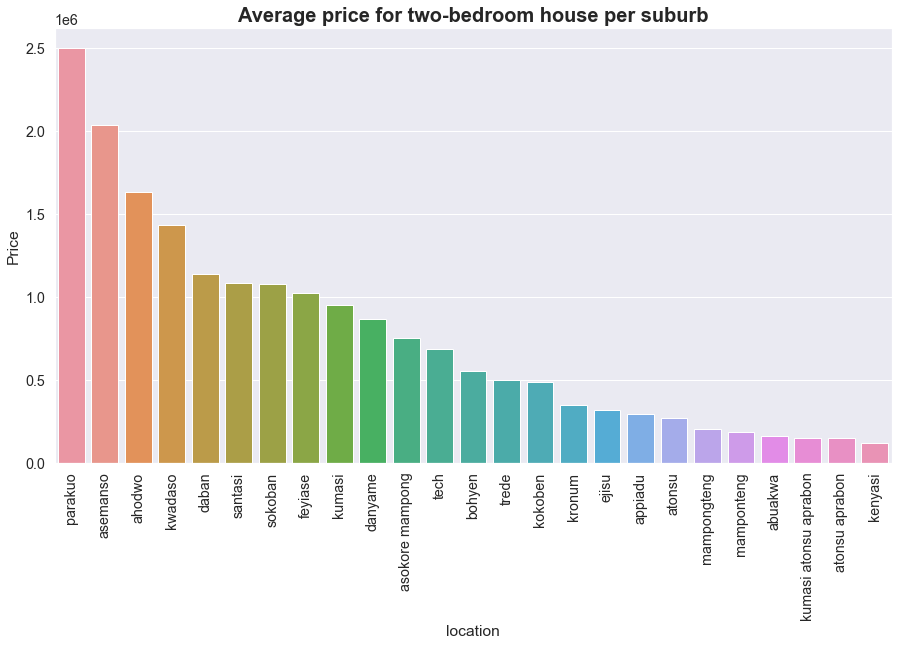

In [129]:
x_axis,y_axis=avg_price_ksi_five_bedroom.location,avg_price_ksi_five_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two-bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Six bedroom house

In [130]:
ksi_six_bedroom=pd.DataFrame(kumasi_housing[(kumasi_housing['no_bedrooms']==6) & (kumasi_housing['location']!='kumasi')])
avg_price_ksi_six_bedroom=pd.DataFrame(ksi_six_bedroom[['price(cedis)','no_bedrooms','no_bathrooms']].groupby(
    ksi_six_bedroom['location']).mean().astype(int)).sort_values('price(cedis)',ascending=False)
avg_price_ksi_six_bedroom.reset_index(inplace=True)
avg_price_ksi_six_bedroom
#three_bed_top_10=avg_price_unfurnished_for_three_bedroom.iloc[:10]
#three_bed_top_10
#& (accra_df['location']!='osu')

,location,price(cedis),no_bedrooms,no_bathrooms
0,ahodwo,710000,6,6
1,buokrom,710000,6,4
2,danyame,593333,6,5
3,tech,565000,6,5
4,kodie afigya kwabre,470000,6,4
5,santasi,385000,6,6
6,sokoban,374166,6,5
7,ejisu,350000,6,4
8,kokoben,322500,6,5
9,feyiase,167500,6,3


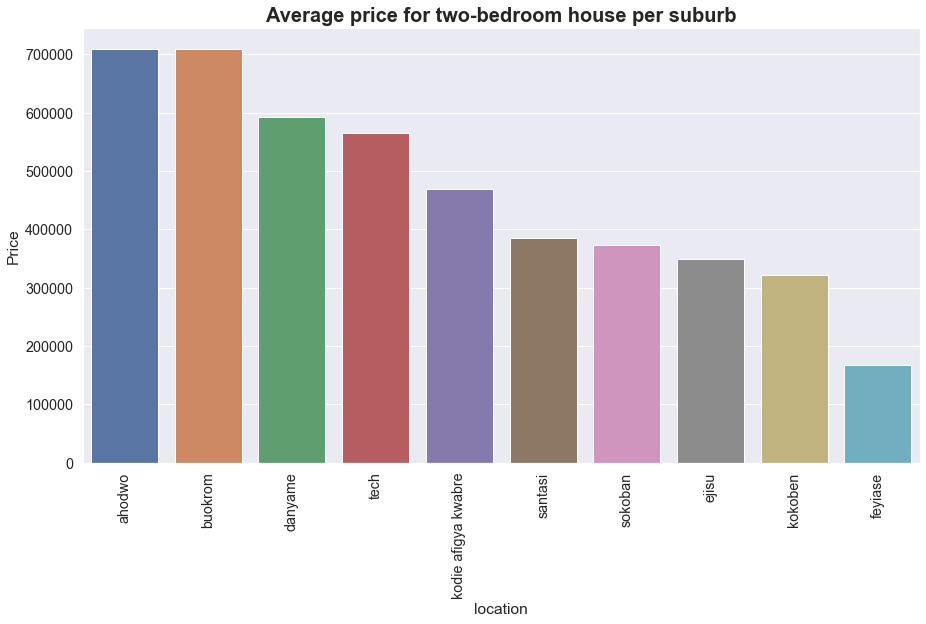

In [131]:
x_axis,y_axis=avg_price_ksi_six_bedroom.location,avg_price_ksi_six_bedroom['price(cedis)']
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Average price for two-bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.3) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Suburbs with the most frquent n number of bedrooms

In [132]:
kumasi_housing[kumasi_housing['no_bedrooms']==2]

,title,price(cedis),no_bedrooms,no_bathrooms,suburb,place,location
30,2 bedrooms uncompleted house at atonsu feyiase...,85000.0,2,2,atonsu feyiase- st margaret university,kumasi,feyiase
62,2 bedrooms house at ahodwo daban new site,300000.0,2,2,ahodwo daban new site,kumasi,daban
83,2 bedrooms house for sale at ntensere,40000.0,2,1,ntensere,kumasi,ntensere


## Suburb with the highest number of two bedroom houses

In [133]:
two_bed_house=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==2])
two_bedroom_house=two_bed_house.groupby('location')['location'].agg('count').sort_values(ascending=False)
#one_bedroom_house#more_than#2=one_bedroom[one_bedroom>2]

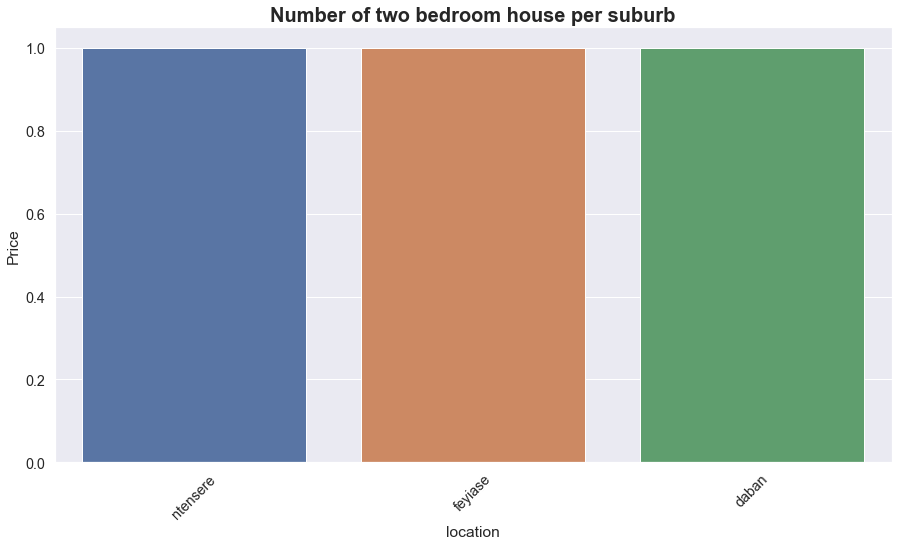

In [134]:
x_axis,y_axis=two_bedroom_house.index,two_bedroom_house.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of two bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=2) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.show(fig)

## Suburb with the highest number of three bedroom houses

In [135]:
three_bed_house=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==3])
three_bedroom_house=three_bed_house.groupby('location')['location'].agg('count').sort_values(ascending=False)
#three_bedroom_house#more_than#2=one_bedroom[one_bedroom>2]

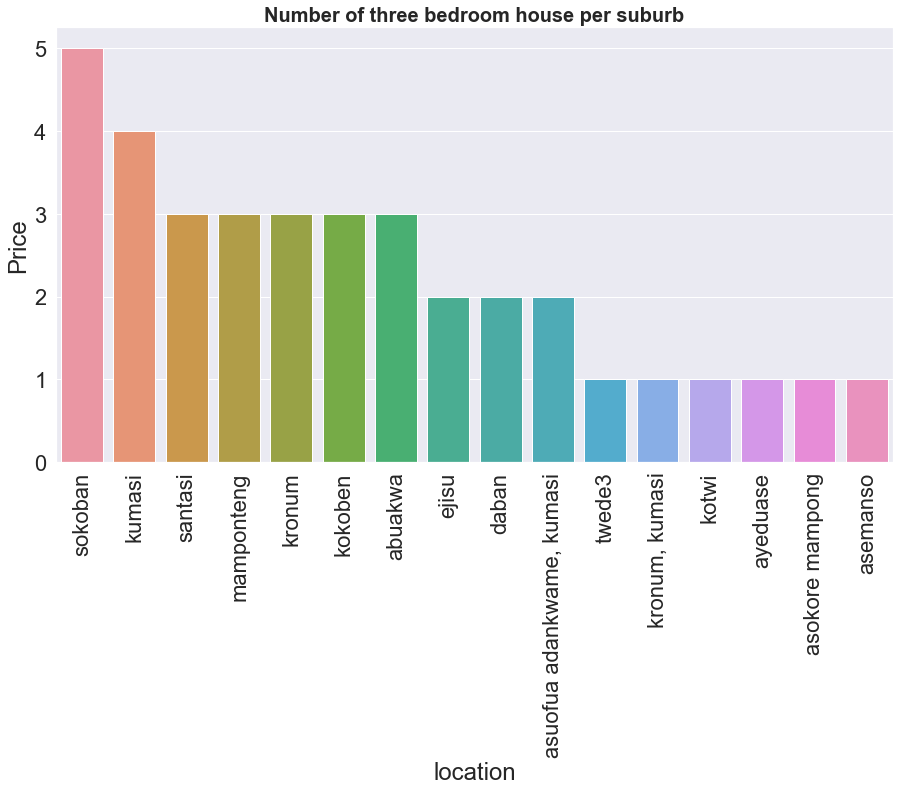

In [136]:
x_axis,y_axis=three_bedroom_house.index,three_bedroom_house.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of three bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## Suburb with the highest number of four bedroom houses¶

In [137]:
four_bed_house=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==4])
four_bedroom_house=four_bed_house.groupby('location')['location'].agg('count').sort_values(ascending=False)
four_bedroom_house#more_than#2=one_bedroom[one_bedroom>2]

location
santasi            19
kokoben            14
mamponteng          6
kumasi              6
ejisu               6
appiadu             4
asokore mampong     3
tech                3
kenyasi             2
daban               2
asemanso            2
kotwi               2
feyiase             2
apeadu              1
asenua              1
buokrom             1
twede3              1
danyame             1
kodie               1
kronum              1
kwadaso             1
pankrono.           1
sokoban             1
ahodwo              1
Name: location, dtype: int64

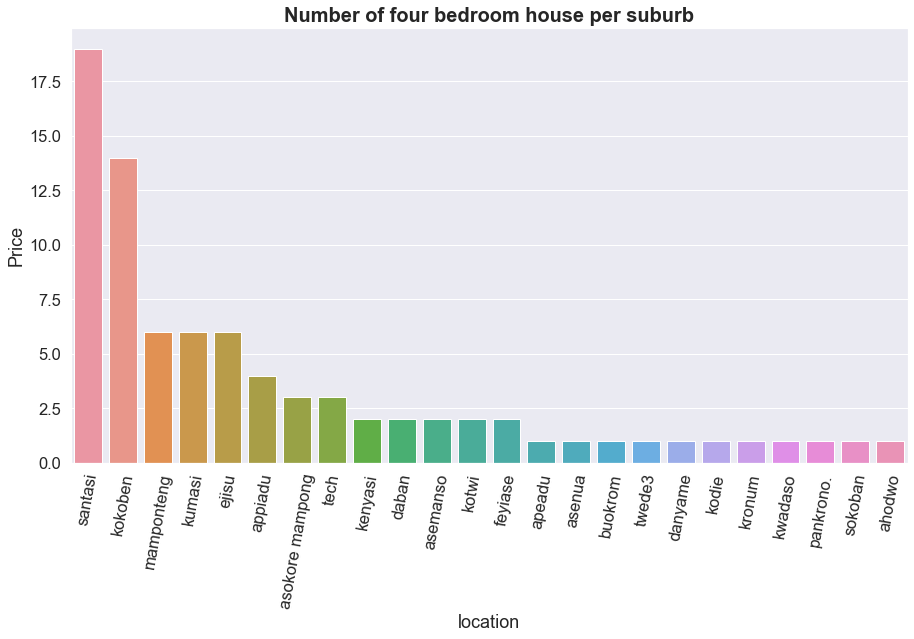

In [138]:
x_axis,y_axis=four_bedroom_house.index,four_bedroom_house.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of four bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=80)
plt.show(fig)

## Suburb with the highest number of five bedroom houses

In [139]:
five_bed_house=pd.DataFrame(kumasi_housing[(kumasi_housing['no_bedrooms']==5)& (kumasi_housing['location']!='kumasi')])
five_bedroom_house=five_bed_house.groupby('location')['location'].agg('count').sort_values(ascending=False)
#three_bedroom_house#more_than#2=one_bedroom[one_bedroom>2]

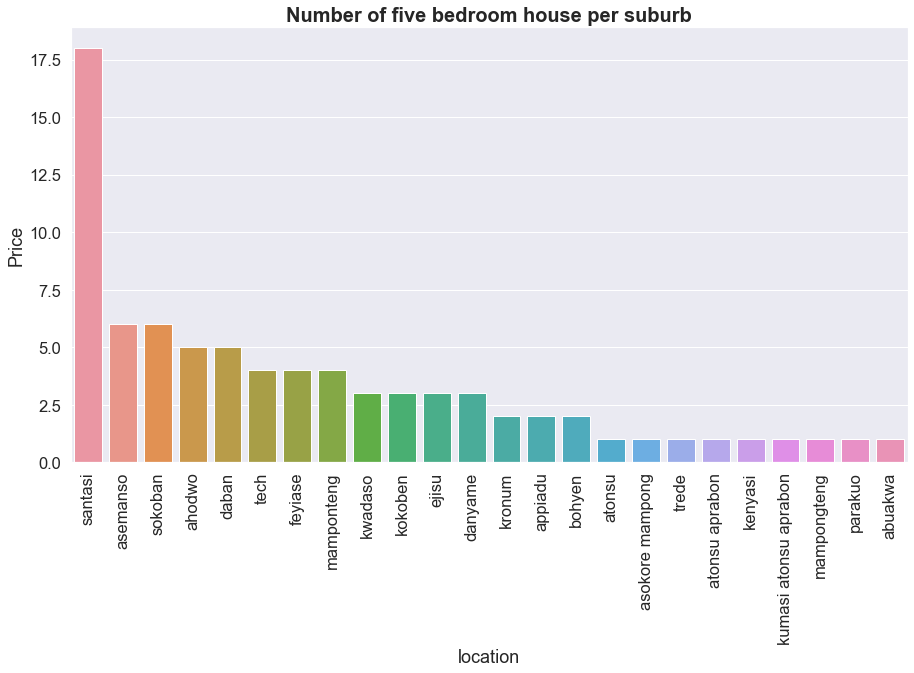

In [140]:
x_axis,y_axis=five_bedroom_house.index,five_bedroom_house.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of five bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

## Suburb with the highest number of six bedroom houses

In [141]:
six_bed_house=pd.DataFrame(kumasi_housing[kumasi_housing['no_bedrooms']==6])
six_bedroom_house=six_bed_house.groupby('location')['location'].agg('count').sort_values(ascending=False)
#three_bedroom_house#more_than#2=one_bedroom[one_bedroom>2]

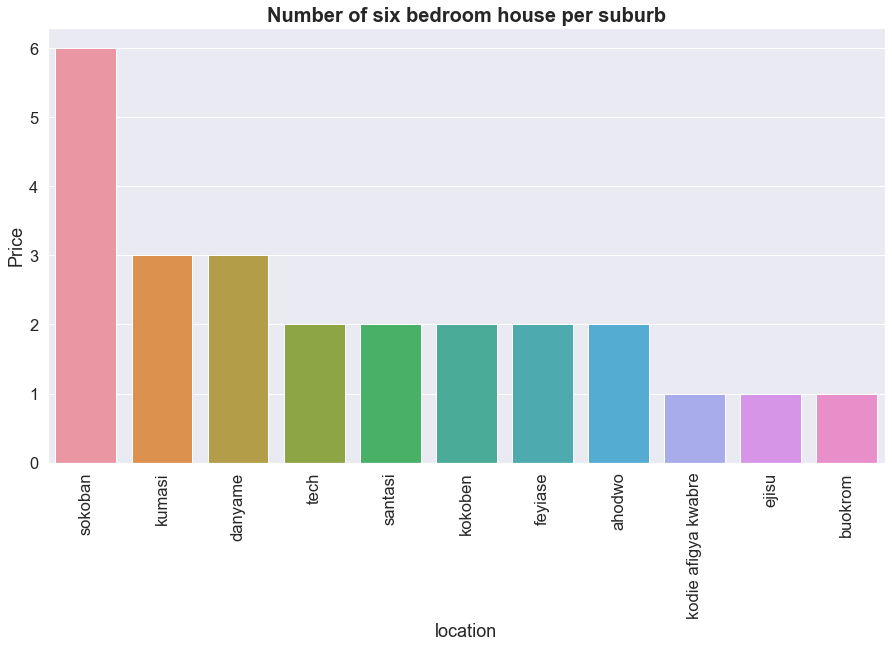

In [142]:
x_axis,y_axis=six_bedroom_house.index,six_bedroom_house.values
plt.figure(figsize=(15,8))
fig = sns.barplot(x_axis,y_axis)
#fig=rr.plot(kind='bar')
plt.title("Number of six bedroom house per suburb",weight='bold').set_fontsize('20')
plt.xlabel('location')
plt.ylabel('Price')
sns.set(font_scale=1.5) 
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

# Conclusion

The analysis found the answers to the research questions.<br>
#### Apartment for rent in Kumasi
* The most expensive suburb  is Ridge with an average rent price of 16767
* The most affordable suburb is Ayigya with an average rent price of 110
* Santasi has the highest number (17) of 1 bedroom apartment
* Kwadaso has the highest number (11) of 2 bedroom apartment
* Tech has the highest number (17) of 3 bedroom apartment
* Kwadaso has the highest number (6) of 4 bedroom apartment

#### Apartment for rent in Accra
* The most expensive suburb is Osu with an average rent price of 63,675 cedis
* The most affordable suburb is Chokor with average rent price of 300 cedis per month

#### House for sale in Kumasi
* The most expensive suburb  is Konkromoase with an average rent price of 3,770,000 cedis
* The most affordable suburb is Ayigya with an average rent price of 229,230 cedis



# References
* https://towardsdatascience.com/a-collection-of-advanced-visualization-in-matplotlib-and-seaborn-with-examples-2150e6c3f323
* https://towardsdatascience.com/6-simple-tips-for-prettier-and-customised-plots-in-seaborn-python-22f02ecc2393
* https://tonaton.com/en/ads/ghana/apartments?sort=date&buy_now=0&urgent=0&page=1
* https://meqasa.com/apartments-for-rent-in-ghana?y=39411922&w=1
